# **Credit-Card-Approval-Rate-Prediction**

**CREDIT CARD APPROVAL RATE PREDICTION**
The dataset consists of following csv files :
Features name: (Credit_Card.csv)
1. Ind_ID: Client ID
2. Gender: Gender information
3. Car_owner: Having car or not
4. Propert_owner: Having property or not
5. Children: Count of children
6. Annual_income: Annual income
7. Type_Income: Income type
8. Education: Education level
9. Marital_status: Marital_status
10. Housing_type: Living style
11. Birthday_count: Use backward count from current day (0), -1 means yesterday.
12. Employed_days: Start date of employment. Use backward count from current day (0).
Positive value means, individual is currently unemployed.
13. Mobile_phone: Any mobile phone
14. Work_phone: Any work phone
15. Phone: Any phone number
16. EMAIL_ID: Any email ID
17. Type_Occupation: Occupation
18. Family_Members: Family size
Another data set (Credit_card_label.csv) contains two key pieces of information
1. ID: The joining key between application data and credit status data, same is Ind_ID
2. Label: 0 is application approved and 1 is application rejected.

In [5]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install fancyimpute
import fancyimpute
from pathlib import Path
from scipy.stats import probplot, chi2_contingency, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
!pip install scikit-plot
import scikitplot as skplt
from yellowbrick.model_selection import FeatureImportances
import scipy.stats as stats
import joblib
import os
%matplotlib inline
!pip install pandas-profiling
import plotly.express as px

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=c444d0e19646d69a884865979fd590f14962dd4cc8e748ad926ed2b59adfd8ac
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=d134d35723d8785deca18376839f9b544389c85bd85cbb3fae957593f3115a65
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━

Reading Both csv Files

In [6]:
df1=pd.read_csv("/content/Credit_card.csv")
df2=pd.read_csv("/content/Credit_card_label.csv")

**Merge Both Files**

In [7]:

df= pd.merge(df1,df2,on="Ind_ID")


**How Big is the Data?**

In [8]:
df.shape

(1548, 19)

**How does the data look like?**

In [9]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


**What's the data type of columns?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

# Data Cleaning

According to this, we have 19 columns-

3 Continous Variables- Annual_Income, Birthday_count, Employed_days.

**Are there any missing values?**

In [11]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In this dataset, the "Type_Occupation" column has 488 null values. This is approximately 31% of the total data points that we have.There are other columns such as Gender, Annula_Income and Birthday_count which have missing values. We are going to use some imputation techniques in this column as well as other columns to deal with these null values.

In [12]:
df.describe(include="all") #describe all variables

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499,0.113049
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772,0.316755
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,0.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,0.000000


**Are there any duplicated values?**

In [13]:
df.duplicated().sum()

0

Our data has no duplicate values.

**Data Cleaning**

In [14]:
#First making copy of dataset
copy=df.copy()


In [15]:
#Converting Birthday in days to year
copy["Birthday_count"]=abs(copy["Birthday_count"]/365)
copy["Birthday_count"]=copy["Birthday_count"].round()

In [16]:
copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,NaN,2,1


In [17]:
copy["Employed_days"]=abs(copy["Employed_days"]/365.25)
copy["Employed_days"]=round(copy["Employed_days"],1)

There is no direct reason for the missing values in GENDER, Annual_income and Birthday_count features. They are missing completely at random. But the column Type_Occupation is having >30% of values missing. This says that people are less likely to tell about their occupation. We will use different imputation techniques to deal with these null vaues and choose the best one for our data cleaning process.



<Axes: >

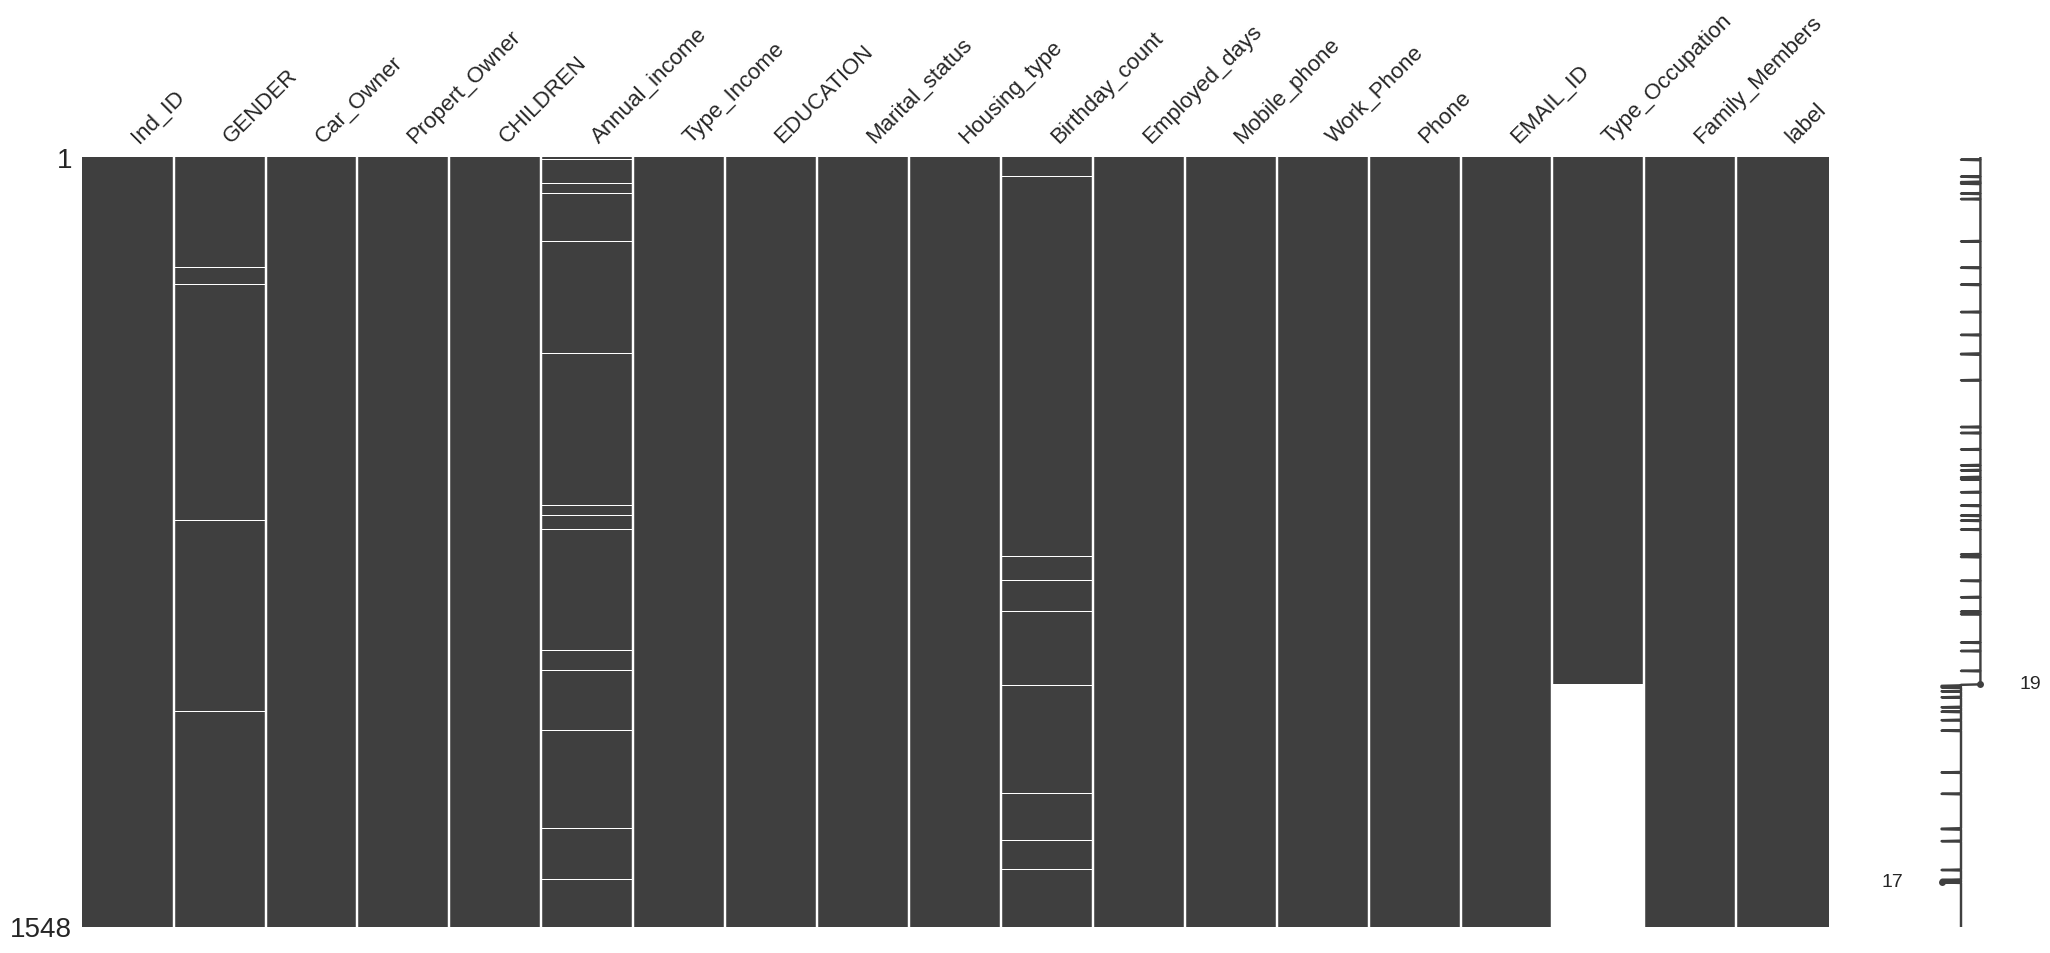

In [18]:
msno.matrix(copy.sort_values(by=['Type_Occupation']))

In [19]:
copy['Type_Occupation']= copy['Type_Occupation'].fillna('Unknown')
copy.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1000.0,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,1.6,1,1,1,0,Unknown,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1


In [20]:
copy= copy.dropna()

In [21]:
copy2= copy.copy()

In [22]:
copy2

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1000.0,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,1000.0,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,9.7,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.3,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,6.8,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,1.8,1,1,1,0,Drivers,2,0


After Dropping null values, we are down to 1496 rows. Originally, we had 1548 rows. This results in the loss of 3% of total original data but we have all clean data now. And we can perform analysis on this data and generate insights.

**Rename Features**

In [23]:
copy2= copy2.rename(columns={
    "Ind_ID"            :"ID",
    'GENDER'            :'Gender',
    'Car_Owner'         :'Has_a_car',
    'Propert_Owner'     :'Has_a_property',
    'CHILDREN'          :'Children_count',
    'Annual_income'     :'Income',
    'Type_Income'       :'Employment_status',
    'EDUCATION'         :'Education_level',
    'Housing_type'      :'Dwelling',
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    'Mobile_phone'      :'Has_a_mobile_phone',
    'Work_Phone'        :"Has_a_work_phone",
    'Phone'             :'Has_a_phone',
    'EMAIL_ID'          :'Has_an_email',
    'Type_Occupation'   :'Job_Title',
    'Family_Members'     :'Family_member_count',
    })

Data Encoding For the Best Imputation of Experience Feature in the Data.

We will do the Imputation of the Experience after doing the Data_Encoding

To Get the Best Imputed Value and to Run all the Imputation KNN and MICE all the data should be Encoded



In [24]:
credit_df = copy2.copy()

In [25]:
credit_df

,ID,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Employed_Years,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_member_count,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1000.0,1,0,0,0,Unknown,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1.6,1,1,1,0,Unknown,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,1000.0,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,9.7,1,0,1,0,Drivers,3,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.3,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,6.8,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,1.8,1,1,1,0,Drivers,2,0


In [26]:
credit_df.Employed_Years.replace(1000,np.NaN,inplace=True)

In [27]:
credit_df['Education_level'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [28]:
# Gender , Car , Property  ---> Numerical Data
credit_df['Gender'].replace('M',0,inplace=True)
credit_df['Gender'].replace('F',1,inplace=True)
credit_df['Has_a_car'].replace('Y',0,inplace=True)
credit_df['Has_a_car'].replace('N',1,inplace=True)
credit_df['Has_a_property'].replace('Y',0,inplace=True)
credit_df['Has_a_property'].replace('N',1,inplace=True)

from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le1 = LabelEncoder()
# fit and transform the Type_Income column
credit_df['Employment_status_Encoded'] = le1.fit_transform(credit_df['Employment_status'])
# Drop the original Type_Income column
credit_df.drop('Employment_status', axis=1, inplace=True)

le2 = LabelEncoder()
credit_df['Dwelling_Encoded'] = le2.fit_transform(credit_df['Dwelling'])
credit_df.drop('Dwelling', axis=1, inplace=True)

le3 = LabelEncoder()
credit_df['Job_Title_Encoded'] = le2.fit_transform(credit_df['Job_Title'])
credit_df.drop('Job_Title', axis=1, inplace=True)



from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
credit_df['Education_level_Encoded'] = encoder.fit_transform(credit_df[['Education_level']])
# drop the original Education_level column
credit_df.drop('Education_level', axis=1, inplace=True)


credit_df['Marital_status'].replace('Civil marriage',"Married",inplace=True)
credit_df['Marital_status'].replace('Widow',"Separated",inplace=True)
credit_df['Marital_status'].replace("Single / not married","Single",inplace=True)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore',sparse_output=False, drop= "first")
# Select the column to be encoded
marital_status = credit_df[['Marital_status']]
# Fit and transform the data using the encoder
marital_encoded_df = pd.DataFrame(encoder.fit_transform(marital_status), columns=["Married","Separated"],dtype=int)
# Concatenate the encoded data with the original dataframe
credit_df = pd.concat([credit_df, marital_encoded_df], axis=1)
# Drop the original column that was encoded
credit_df.drop(['Marital_status'], axis=1, inplace=True)

Imputing row 1/1546 with 1 missing, elapsed time: 0.494
Imputing row 101/1546 with 1 missing, elapsed time: 0.496
Imputing row 201/1546 with 0 missing, elapsed time: 0.497
Imputing row 301/1546 with 0 missing, elapsed time: 0.498
Imputing row 401/1546 with 1 missing, elapsed time: 0.500
Imputing row 501/1546 with 0 missing, elapsed time: 0.503
Imputing row 601/1546 with 0 missing, elapsed time: 0.504
Imputing row 701/1546 with 0 missing, elapsed time: 0.505
Imputing row 801/1546 with 0 missing, elapsed time: 0.507
Imputing row 901/1546 with 1 missing, elapsed time: 0.508
Imputing row 1001/1546 with 0 missing, elapsed time: 0.509
Imputing row 1101/1546 with 0 missing, elapsed time: 0.510
Imputing row 1201/1546 with 0 missing, elapsed time: 0.511
Imputing row 1301/1546 with 1 missing, elapsed time: 0.512
Imputing row 1401/1546 with 1 missing, elapsed time: 0.514
Imputing row 1501/1546 with 18 missing, elapsed time: 0.518


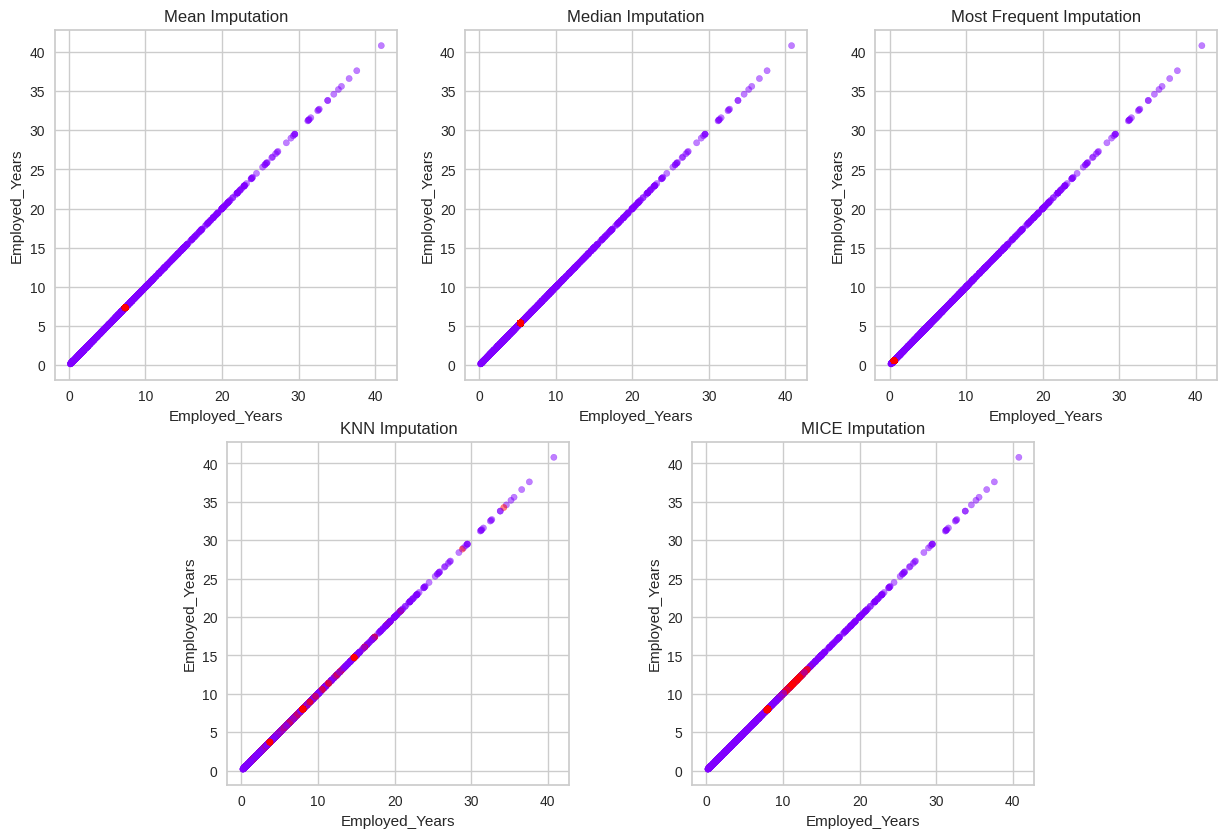

In [29]:
#Mean Imputation
from sklearn.impute import SimpleImputer
credit_mean = credit_df.copy()
mean_imputer = SimpleImputer(strategy="mean")
credit_mean.iloc[:,:] = mean_imputer.fit_transform(credit_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
credit_median = credit_df.copy()
median_imputer = SimpleImputer(strategy="median")
credit_median.iloc[:,:] = median_imputer.fit_transform(credit_median)
credit_median

#Mode Imputation
from sklearn.impute import SimpleImputer
credit_mode = credit_df.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
credit_mode.iloc[:,:] = mode_imputer.fit_transform(credit_mode)
credit_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
credit_knn = credit_df.copy()
credit_knn.iloc[:,:] = knn_imputer.fit_transform(credit_knn)
credit_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
credit_MICE = credit_df.copy(deep=True)
credit_MICE.iloc[:, :] = MICE_imputer.fit_transform(credit_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = credit_df['Employed_Years'].isnull() + credit_df['Age'].isnull()
imputations = {'Mean Imputation': credit_mean,
               'Median Imputation': credit_median,
               'Most Frequent Imputation': credit_mode,
               'KNN Imputation': credit_knn,
              'MICE Imputation': credit_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

KNN imputer work best from all.Will use KNN for this column.

In [30]:
# Taking our imputed Employed_Years Column to the Main DataFrame
credit_df = credit_knn.copy()
credit_employ = credit_df[["ID","Employed_Years"]]
data_sql = credit_employ.merge(copy2,how="inner" , on = ["ID"])
data_sql.drop("Employed_Years_y",axis=1,inplace=True)
data_sql

,ID,Employed_Years_x,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_member_count,label
0,5008827.0,6.814336,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1,0,0,0,Unknown,2,1
1,5009744.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
2,5009752.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
3,5009754.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
4,5009894.0,3.212239,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5118268.0,9.700000,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,1,0,1,0,Drivers,3,0
1492,5023655.0,3.300000,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,1,0,0,0,Accountants,1,0
1493,5115992.0,6.800000,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,1,0,0,0,Managers,4,0
1494,5118219.0,1.800000,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,1,1,1,0,Drivers,2,0


In [31]:
data_sql.set_index('ID', inplace= True)

Here data cleaning process is done.Now the final dataframe will be exported to run general data analysis queries in SQL and derive some insights from the data.

In [32]:
data = pd.DataFrame(data_sql)

In [33]:
data.to_csv('data.csv', index=True)

After cleaning the data and answering some of the basic questions, We are going to perform EDA.



# *Exploratory Data analysis(EDA)*

In [34]:
data

,Employed_Years_x,Gender,Has_a_car,Has_a_property,Children_count,Income,Employment_status,Education_level,Marital_status,Dwelling,Age,Has_a_mobile_phone,Has_a_work_phone,Has_a_phone,Has_an_email,Job_Title,Family_member_count,label
ID,,,,,,,,,,,,,,,,,,
5008827.0,6.814336,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,51.0,1,0,0,0,Unknown,2,1
5009744.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
5009752.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
5009754.0,1.600000,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,37.0,1,1,1,0,Unknown,2,1
5009894.0,3.212239,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,61.0,1,0,0,0,Unknown,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5118268.0,9.700000,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,31.0,1,0,1,0,Drivers,3,0
5023655.0,3.300000,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,1,0,0,0,Accountants,1,0
5115992.0,6.800000,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,36.0,1,0,0,0,Managers,4,0


In [35]:
#Renaming the Features names
data= data.rename(columns={
   "Employed_Years_x"     : "Experience",
   "Gender"               : "GENDER",
   "Has_a_car"            : "Car_Owner",
   "Has_a_property"       : "Property_Owner",
   "Children_count"       : "CHILDREN",
   "Income"               : "Annual_income",
   "Employment_status"    : "Type_Income",
   "Education_level"      : "EDUCATION",
   "Dwelling"             : "Housing_type",
   "Has_a_mobile_phone"   : "Mobile_phone",
   "Has_a_work_phone"     : "Work_Phone",
   "Has_a_phone"          : "Phone",
   "Has_an_email"         : "EMAIL_ID",
   "Job_Title"            : "Type_Occupation",
   "Family_Member_count"   : "Family_Members"})

In [36]:
def categorical_summary(data, column_name):
    '''
    This function takes in a dataframe and a column name and returns a summary of the categorical data
    '''
    total_count = data[column_name].count()
    category_counts = data[column_name].value_counts()
    category_percentages = round((category_counts/total_count)*100, 2)
    summary_data = pd.concat([category_counts, category_percentages], axis=1)
    summary_data.columns = ['Category Count', 'Category Percentage']
    return summary_data

# Univariate Analysis

<Axes: xlabel='GENDER', ylabel='count'>

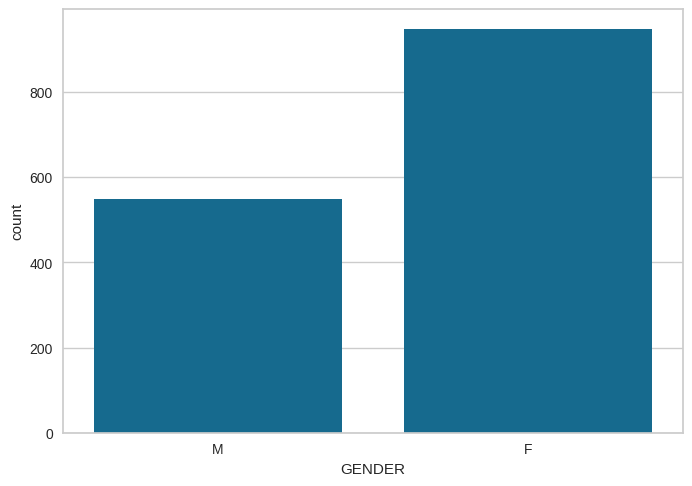

In [37]:
sns.countplot(x='GENDER', data=data)

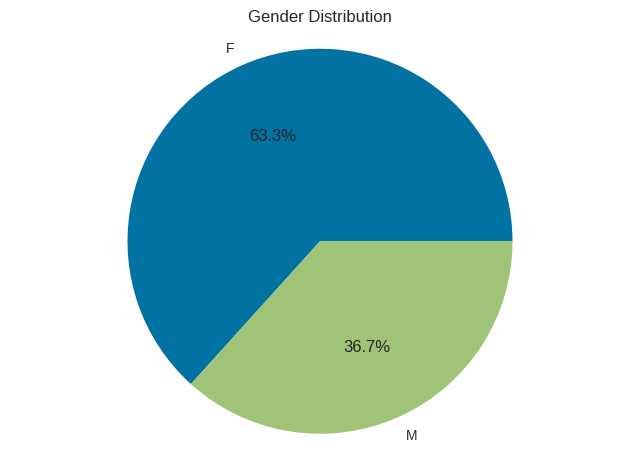

In [38]:
# Group the data by gender and count the number of occurrences
gender_counts = data.groupby('GENDER')['GENDER'].count()

# Create a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

By this we conclude having more female applicants.

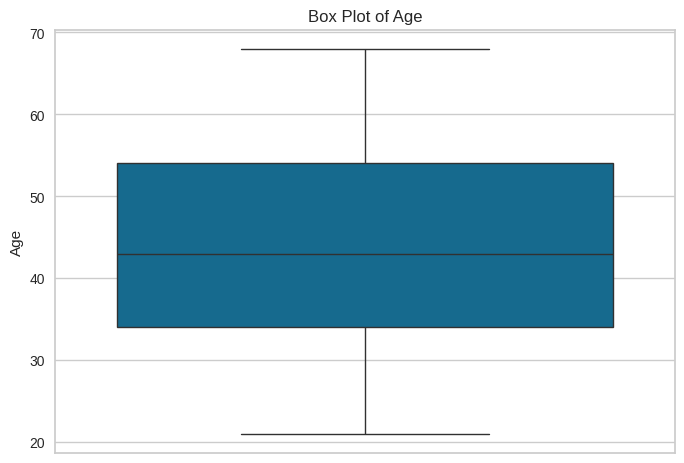

In [39]:
# Create box plot for age column
sns.boxplot(data=data, y='Age')
plt.title('Box Plot of Age')
plt.show()

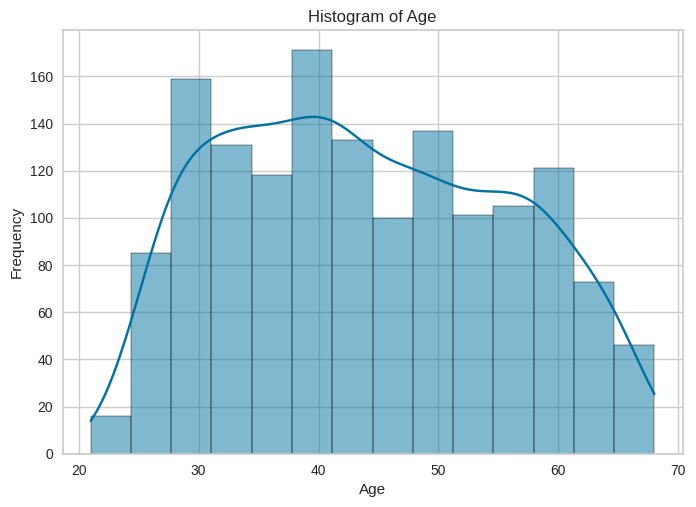

In [40]:
# Create histogram for age column
sns.histplot(data=data, x='Age', kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Bivariante with target variable

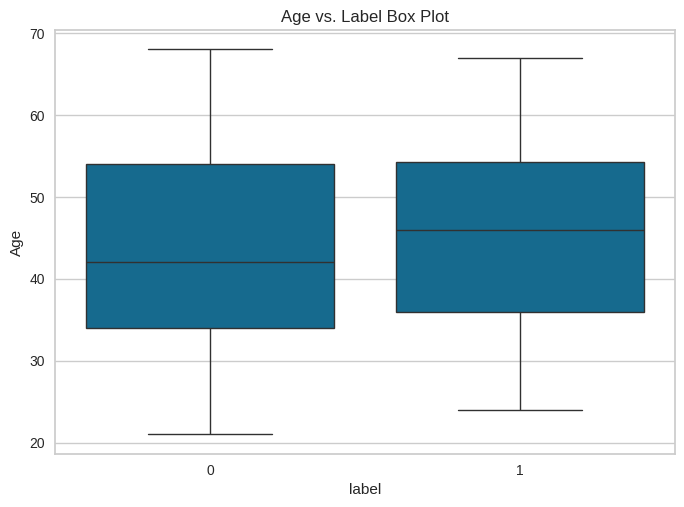

In [41]:
sns.boxplot(x='label', y='Age', data=data)
plt.title('Age vs. Label Box Plot')
plt.show()

Interpretation:

- Age range: 21 to 68 years.
- Average age: 43, Median: 42 (outliers considered).
- Slight positive skew indicates a younger age cluster.
- Limited difference in average age between high and low-risk applicants.
- Overall, balanced age distribution with a preference towards younger applicants.



In [42]:
categorical_summary(data, 'Marital_status')

,Category Count,Category Percentage
Married,1011,67.58
Single / not married,218,14.57
Civil marriage,101,6.75
Separated,91,6.08
Widow,75,5.01


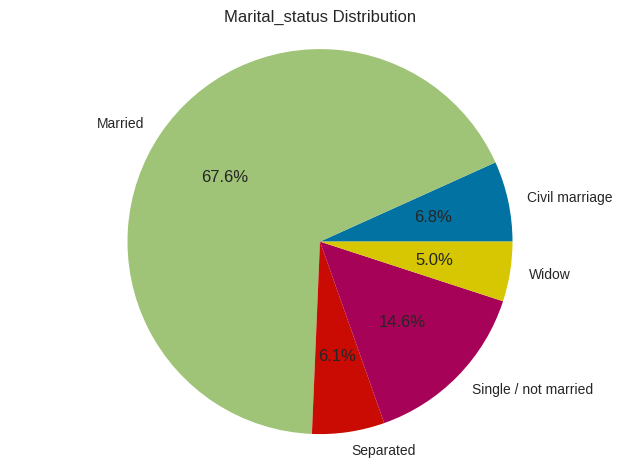

In [43]:
# Group the data by Marital_status and count the number of occurrences
Marital_status_counts = data.groupby('Marital_status')['Marital_status'].count()

# Create a pie chart
plt.pie(Marital_status_counts, labels=Marital_status_counts.index, autopct='%1.1f%%')
plt.title('Marital_status Distribution')
plt.axis('equal')
plt.show()

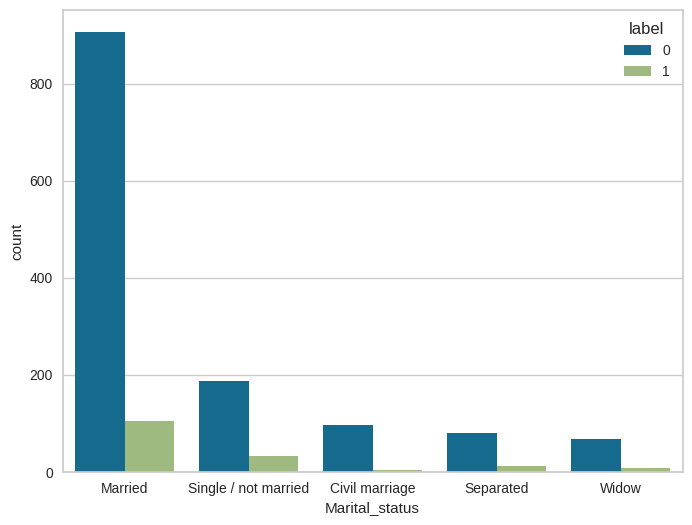

In [44]:
plt.figure(figsize=(8,6))
sns.countplot(x='Marital_status', hue='label', data=data)
plt.show()

Interpretation:

Most applicants are married

Even though we have a higher number of applicants who are separated than those who are widow, it seems like widow applicants are low risk than those who are separated.

In [45]:
data.columns

Index(['Experience', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_member_count', 'label'],
      dtype='object')

In [46]:
categorical_summary(data, 'Family_member_count')

,Category Count,Category Percentage
2,773,51.67
1,322,21.52
3,261,17.45
4,123,8.22
5,15,1.00
6,1,0.07
15,1,0.07


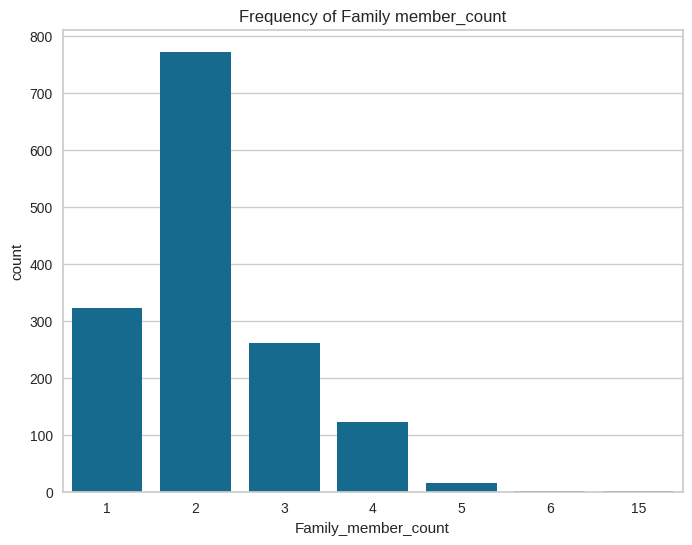

In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='Family_member_count', data=data)
plt.title('Frequency of Family member_count')
plt.show()

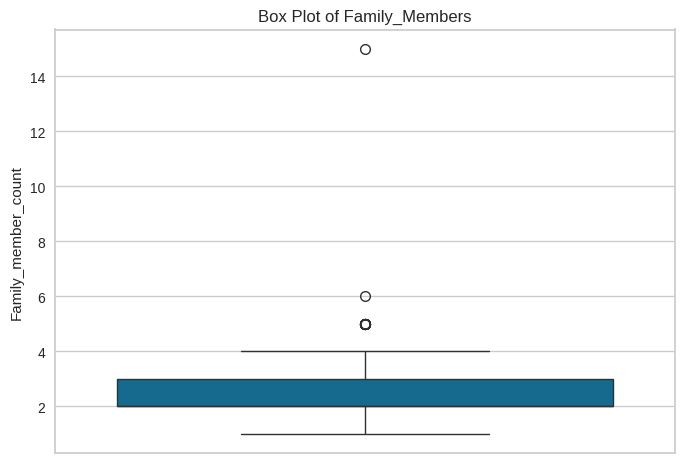

In [48]:
# Create box plot for Family_Members column
sns.boxplot(data=data, y='Family_member_count')
plt.title('Box Plot of Family_Members')
plt.show()

Interpretation:

Most applicants are two in their household, this is also confirmed with the fact that most don’t have a child.

We also have 3 outliers, 1 of them is extreme with 15 members in their household.

**Children**

In [49]:
data["CHILDREN"].describe()

count    1496.000000
mean        0.415775
std         0.780784
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        14.000000
Name: CHILDREN, dtype: float64

In [50]:
categorical_summary(data, 'CHILDREN')

,Category Count,Category Percentage
0,1051,70.25
1,298,19.92
2,129,8.62
3,16,1.07
4,1,0.07
14,1,0.07


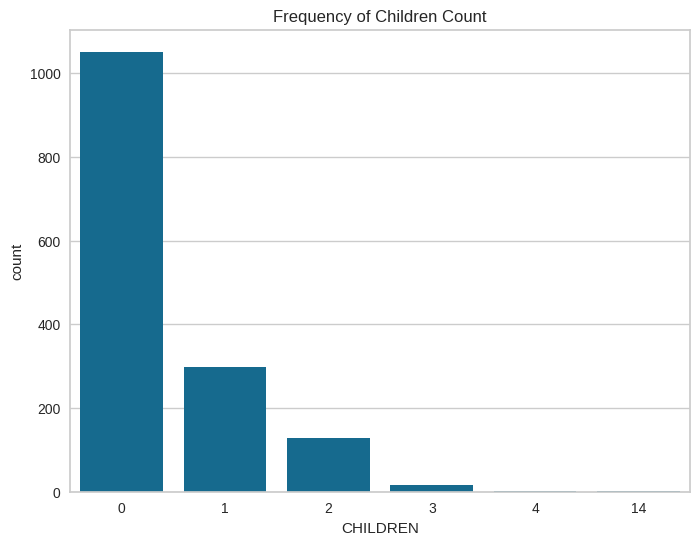

In [51]:
plt.figure(figsize=(8,6))
sns.countplot(x='CHILDREN', data=data)
plt.title('Frequency of Children Count')
plt.show()

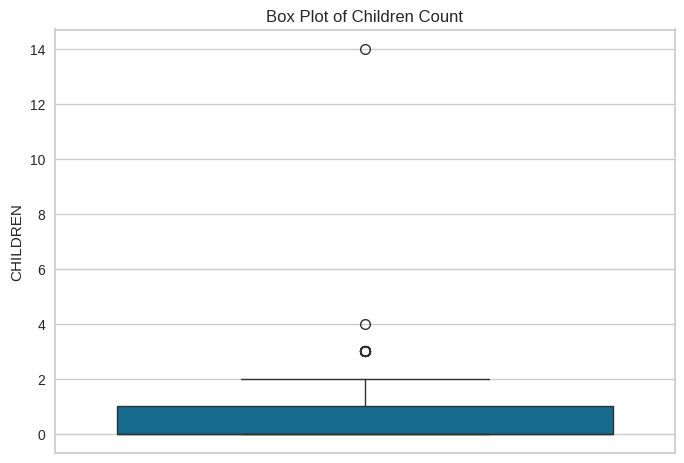

In [52]:
sns.boxplot(data=data, y='CHILDREN')
plt.title('Box Plot of Children Count')
plt.show()

Interpretation:

As previously discussed most applicant don’t have a child

Also here we have 3 outliers, probably the same from the family_members.

**Housing Type**

In [53]:
categorical_summary(data, 'Housing_type')

,Category Count,Category Percentage
House / apartment,1331,88.97
With parents,79,5.28
Municipal apartment,51,3.41
Rented apartment,21,1.40
Office apartment,9,0.60
Co-op apartment,5,0.33


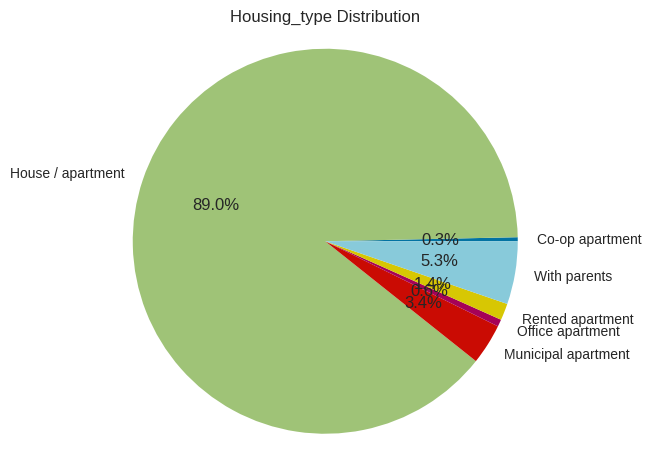

In [54]:
# Group the data by Housing_type and count the number of occurrences
Housing_type_counts = data.groupby('Housing_type')['Housing_type'].count()

# Create a pie chart
plt.pie(Housing_type_counts, labels=Housing_type_counts.index, autopct='%1.1f%%')
plt.title('Housing_type Distribution')
plt.axis('equal')
plt.show()

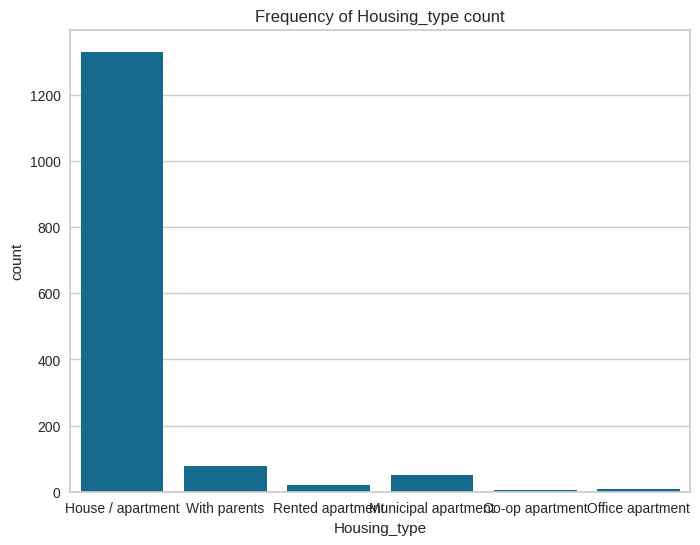

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x='Housing_type', data=data)
plt.title('Frequency of Housing_type count')
plt.show()

In [56]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data["Annual_income"].describe()

count      1496.00
mean     190775.05
std      113138.37
min       33750.00
25%      121050.00
50%      166050.00
75%      225000.00
max     1575000.00
Name: Annual_income, dtype: float64

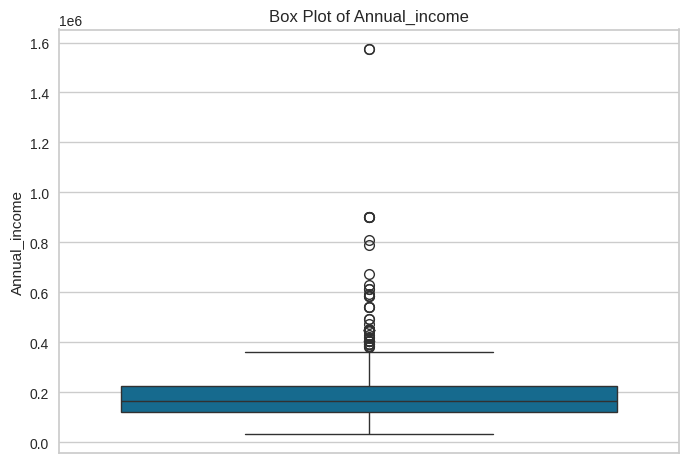

In [57]:
sns.boxplot(data=data, y='Annual_income')
plt.title('Box Plot of Annual_income')
plt.show()

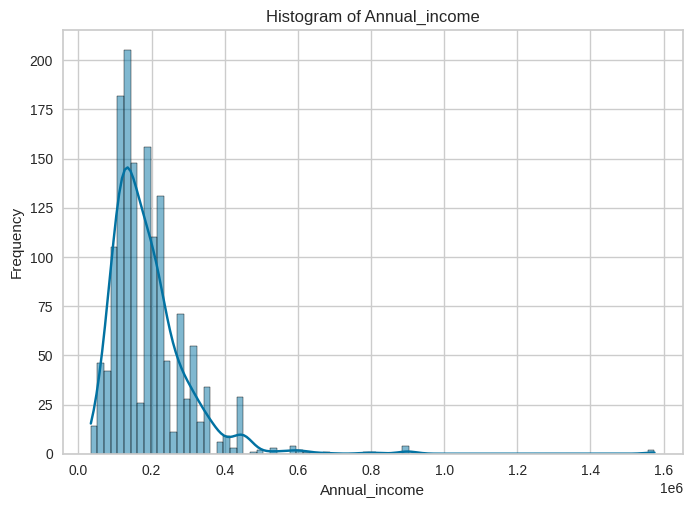

In [58]:
# Create histogram for age column
sns.histplot(data=data, x='Annual_income', kde=True)
plt.title('Histogram of Annual_income')
plt.xlabel('Annual_income')
plt.ylabel('Frequency')
plt.show()

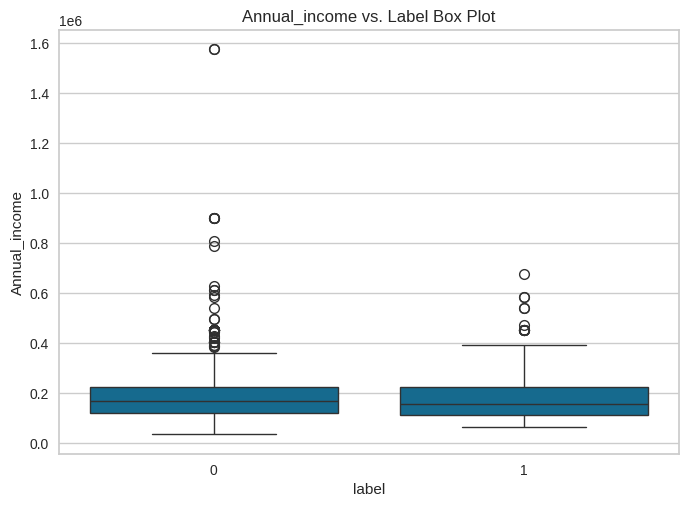

In [59]:
sns.boxplot(x='label', y='Annual_income', data=data)
plt.title('Annual_income vs. Label Box Plot')
plt.show()

Interpretation:

The average income is 190775 but this amount accounts for outliers. If we ignore the outlier most people make 166050.

We have 1 applicant who makes more than 1000000

This feature is positively skewed

High risk and low risk applicants have roughly similar income

**Type_Occupation**

In [60]:
categorical_summary(data, 'Type_Occupation')

,Category Count,Category Percentage
Unknown,471,31.48
Laborers,259,17.31
Core staff,171,11.43
Managers,130,8.69
Sales staff,118,7.89
Drivers,85,5.68
High skill tech staff,62,4.14
Medicine staff,49,3.28
Accountants,42,2.81
Security staff,24,1.60


In [61]:
fig = px.histogram(data, x="Type_Occupation", color="Type_Occupation",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="Type of Occupation Distribution",width=800, height=400)
fig.update_layout(xaxis_title="Type of Occupation", yaxis_title="Count")
fig.show()

Interpretation:

The highly productive Job title is laborers by far.

We have 31.48% of missing data.



In [62]:
categorical_summary(data, 'Type_Income')

,Category Count,Category Percentage
Working,769,51.40
Commercial associate,353,23.60
Pensioner,259,17.31
State servant,115,7.69


In [63]:
fig = px.histogram(data, x="Type_Income", color="Type_Income",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="Type of Income Distribution", width=800, height=400)
fig.update_layout(xaxis_title="Type of Income", yaxis_title="Count")
fig.show()

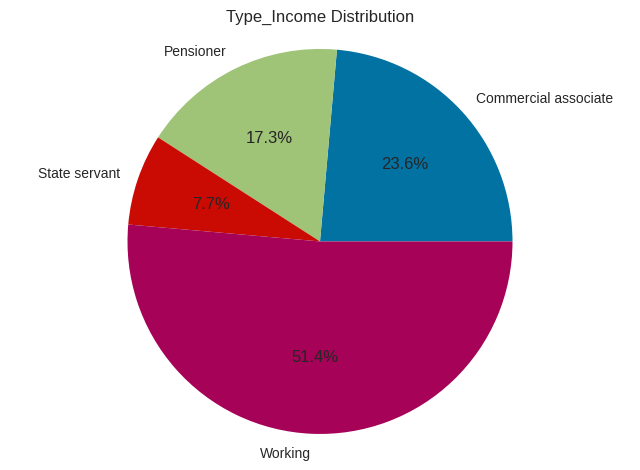

In [64]:
# Group the data by Type_Income and count the number of occurrences
Type_Income_counts = data.groupby('Type_Income')['Type_Income'].count()

# Create a pie chart
plt.pie(Type_Income_counts, labels=Type_Income_counts.index, autopct='%1.1f%%')
plt.title('Type_Income Distribution')
plt.axis('equal')
plt.show()

Most applicants are working.

**Education**

In [65]:
fig = px.histogram(data, x="EDUCATION", color="EDUCATION",
                   color_discrete_sequence=px.colors.qualitative.Set2,
                   title="EDUCATION Distribution", width=800, height=400)
fig.update_layout(xaxis_title="Type of EDUCATION", yaxis_title="Count")
fig.show()

In [66]:
fig = px.pie(data, names='EDUCATION', width=800, height=400)
fig.show()

Interpretation:

The majority of applicants have completed their secondary degree, ¼(One- Fourth) completed their higher education.

Experience

In [67]:
data["Experience"].describe()

count   1496.00
mean       7.33
std        6.37
min        0.20
25%        2.80
50%        5.65
75%        9.70
max       40.80
Name: Experience, dtype: float64

In [68]:
# create a box plot for the experience column
fig = px.box(data, y="Experience", title="Experience Box Plot",width=800, height=400)

# show the plot
fig.show()

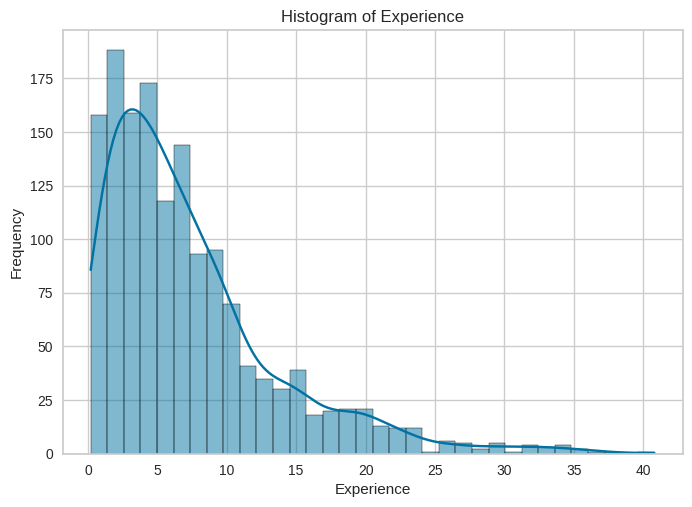

In [69]:
# Create histogram for Experience column
sns.histplot(data=data, x='Experience', kde=True)
plt.title('Histogram of Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')
plt.show()

**Bivariate analysis with target data**

In [70]:
fig = px.box(data, x="label", y="Experience", color="label",width=800, height=400)
fig.show()

Interpretation:

Most of applicant have been working for 3 to 6 years on average.

We have quite a number of outliers who have been working for more than 20 years+.

The Experience variable is positively skewed

Those who are high risk have a low employment length of 3 versus 6 years for the low risk

In [71]:
categorical_summary(data, 'Car_Owner')

,Category Count,Category Percentage
N,898,60.03
Y,598,39.97


In [72]:
fig = px.histogram(data_frame=data, x='Car_Owner', color='Car_Owner', barmode='group', width=800, height=400)
fig.show()

Interpretation:

Most applicant don’t own a car

In [73]:
categorical_summary(data, 'Property_Owner')

,Category Count,Category Percentage
Y,977,65.31
N,519,34.69


In [74]:
fig = px.histogram(data_frame=data, x='Property_Owner', color='Property_Owner', barmode='group', width=800, height=400)
fig.show()

In [75]:
categorical_summary(data, 'Work_Phone')

,Category Count,Category Percentage
0,1188,79.41
1,308,20.59


In [76]:
fig = px.histogram(data_frame=data, x='Work_Phone', color='Work_Phone', barmode='group', width=800, height=400)
fig.show()

In [77]:
categorical_summary(data, 'Mobile_phone')

,Category Count,Category Percentage
1,1496,100.00


In [78]:
categorical_summary(data, 'Phone')

,Category Count,Category Percentage
0,1040,69.52
1,456,30.48


In [79]:
fig = px.histogram(data_frame=data, x='Phone', color='Phone', barmode='group', width=800, height=400)
fig.show()

In [80]:
categorical_summary(data, 'EMAIL_ID')


,Category Count,Category Percentage
0,1355,90.57
1,141,9.43


In [81]:
fig = px.histogram(data_frame=data, x='EMAIL_ID', color='EMAIL_ID', barmode='group', width=800, height=400)
fig.show()

In [82]:
categorical_summary(data, 'label')

,Category Count,Category Percentage
0,1336,89.30
1,160,10.70


In [83]:
fig = px.histogram(data_frame=data, x='label', color='label', barmode='group', width=800, height=400)
fig.show()

**Interpretation**

Most applicant don’t own a car.
Most applicant own a property.
More than ¾ of applicants don’t have a work phone
Most applicants don’t have a phone (probably a home phone)
More than 90% of applicants don’t have an email
A vast majority of applicants are Approved applicants. We have a very imbalance data.

# **Bivariate Analysis**

Numerical vs numerical features (Correlation & scatter plots)

Scatter plot

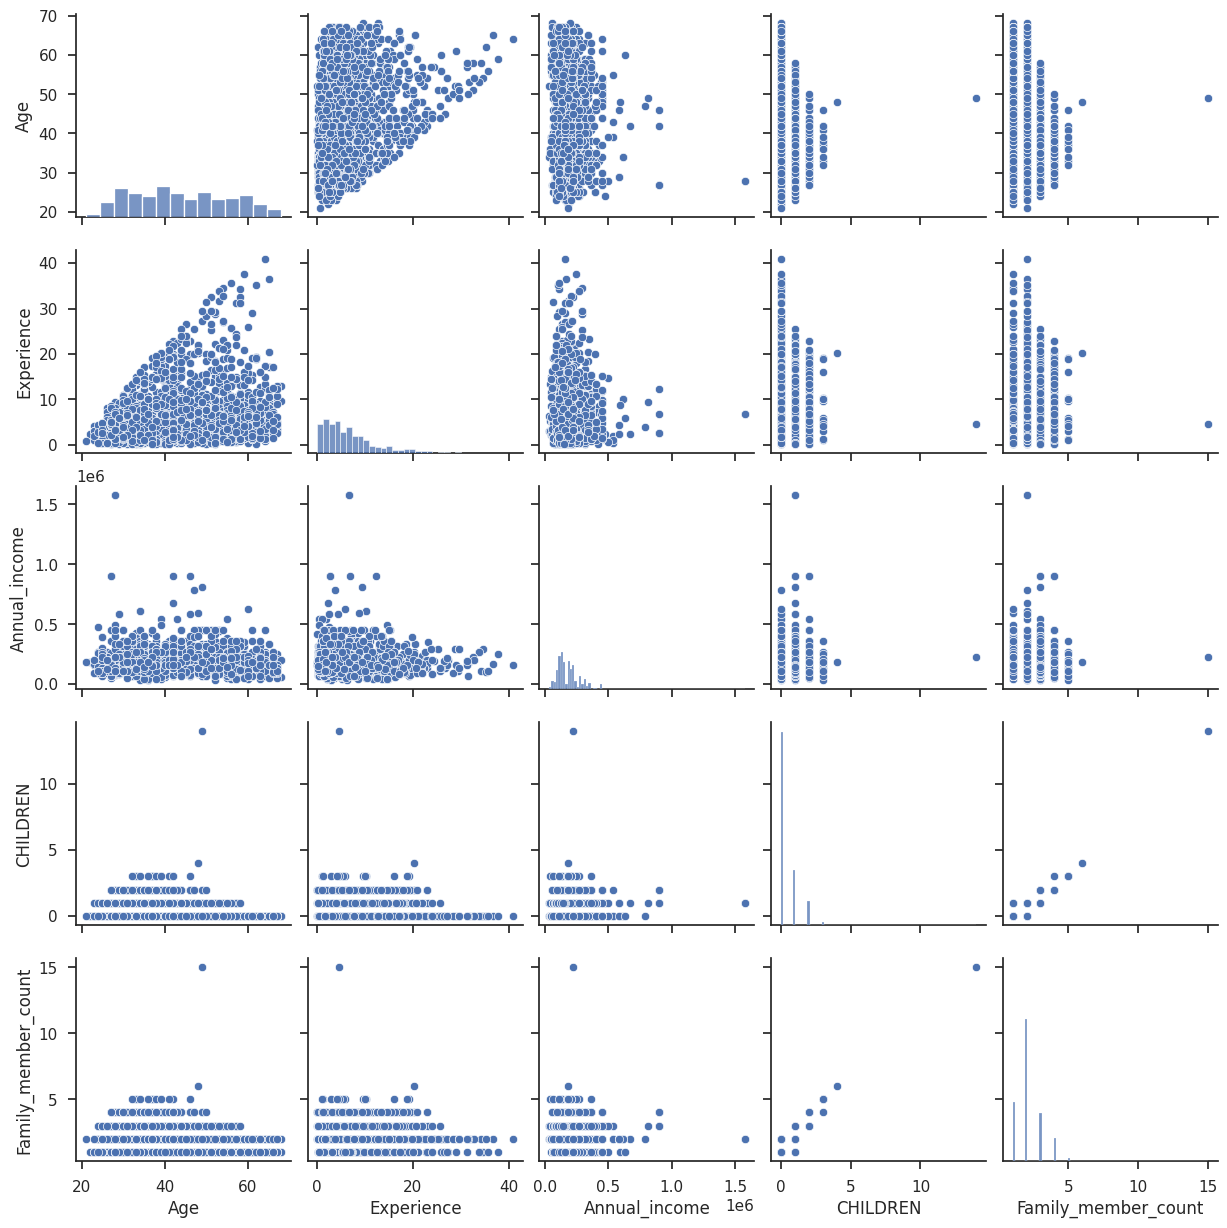

In [84]:
numerical_cols = ['Age', 'Experience', 'Annual_income','CHILDREN','Family_member_count']

# Create a scatter matrix
sns.set_theme(style="ticks")
sns.pairplot(data[numerical_cols])

Interpretation:

We can see a positive linear correlation between the family member and the children count. This makes sense, the more the children someone have, the larger the family member count. This is a multicollinearity problem. Meaning that the features are highly correlated. We will need to drop one of them.

Another interesting trend is the experience and age. This also makes sense, the longer the employee has been working, the older they are.

**# Correlation analysis**

In [85]:
# change the datatype of target feature to int
label_int = data['label'].astype('int32')

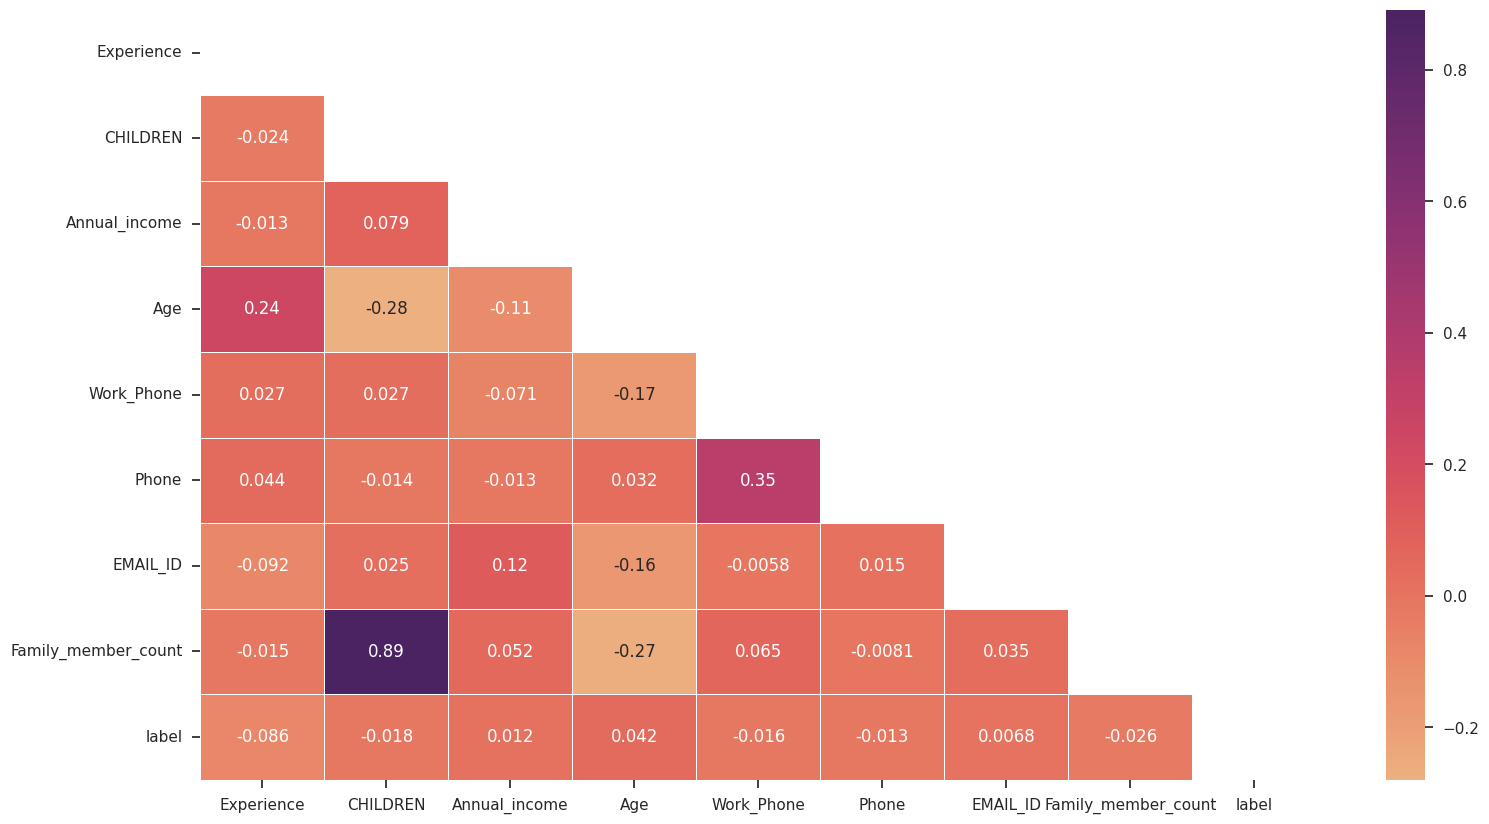

In [86]:
# correlation analysis with heatmap, after dropping the has a mobile phone with the target feature as int
data_without_mobile_corr = pd.concat([data.drop(['Mobile_phone','label'], axis=1),label_int],axis=1).corr()
# Get the lower triangle of the correlation matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(data_without_mobile_corr, dtype='bool')
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(18,10))
# seaborn heatmap
sns.heatmap(data_without_mobile_corr, annot=True, cmap='flare',mask=mask, linewidths=.5)
# plot the heatmap
plt.show()

Interpretation:

There is no feature that is correlated with the target feature

Family member count is highly correlated with children count as previously discussed

Age has some positive correlation with the family member count and children count. The older a person is, the most likely he/she will have a larger family.

Another positive correlation is having a phone and having a work phone.

The final positive correlation is between the age and work phone. The younger someone is the less likely he/she will have a work phone.

We also have a negative correlation between the employment length and the age as previously seen.

# **Numerical vs categorical features (ANOVA)**
Age vs the rest of categorical features

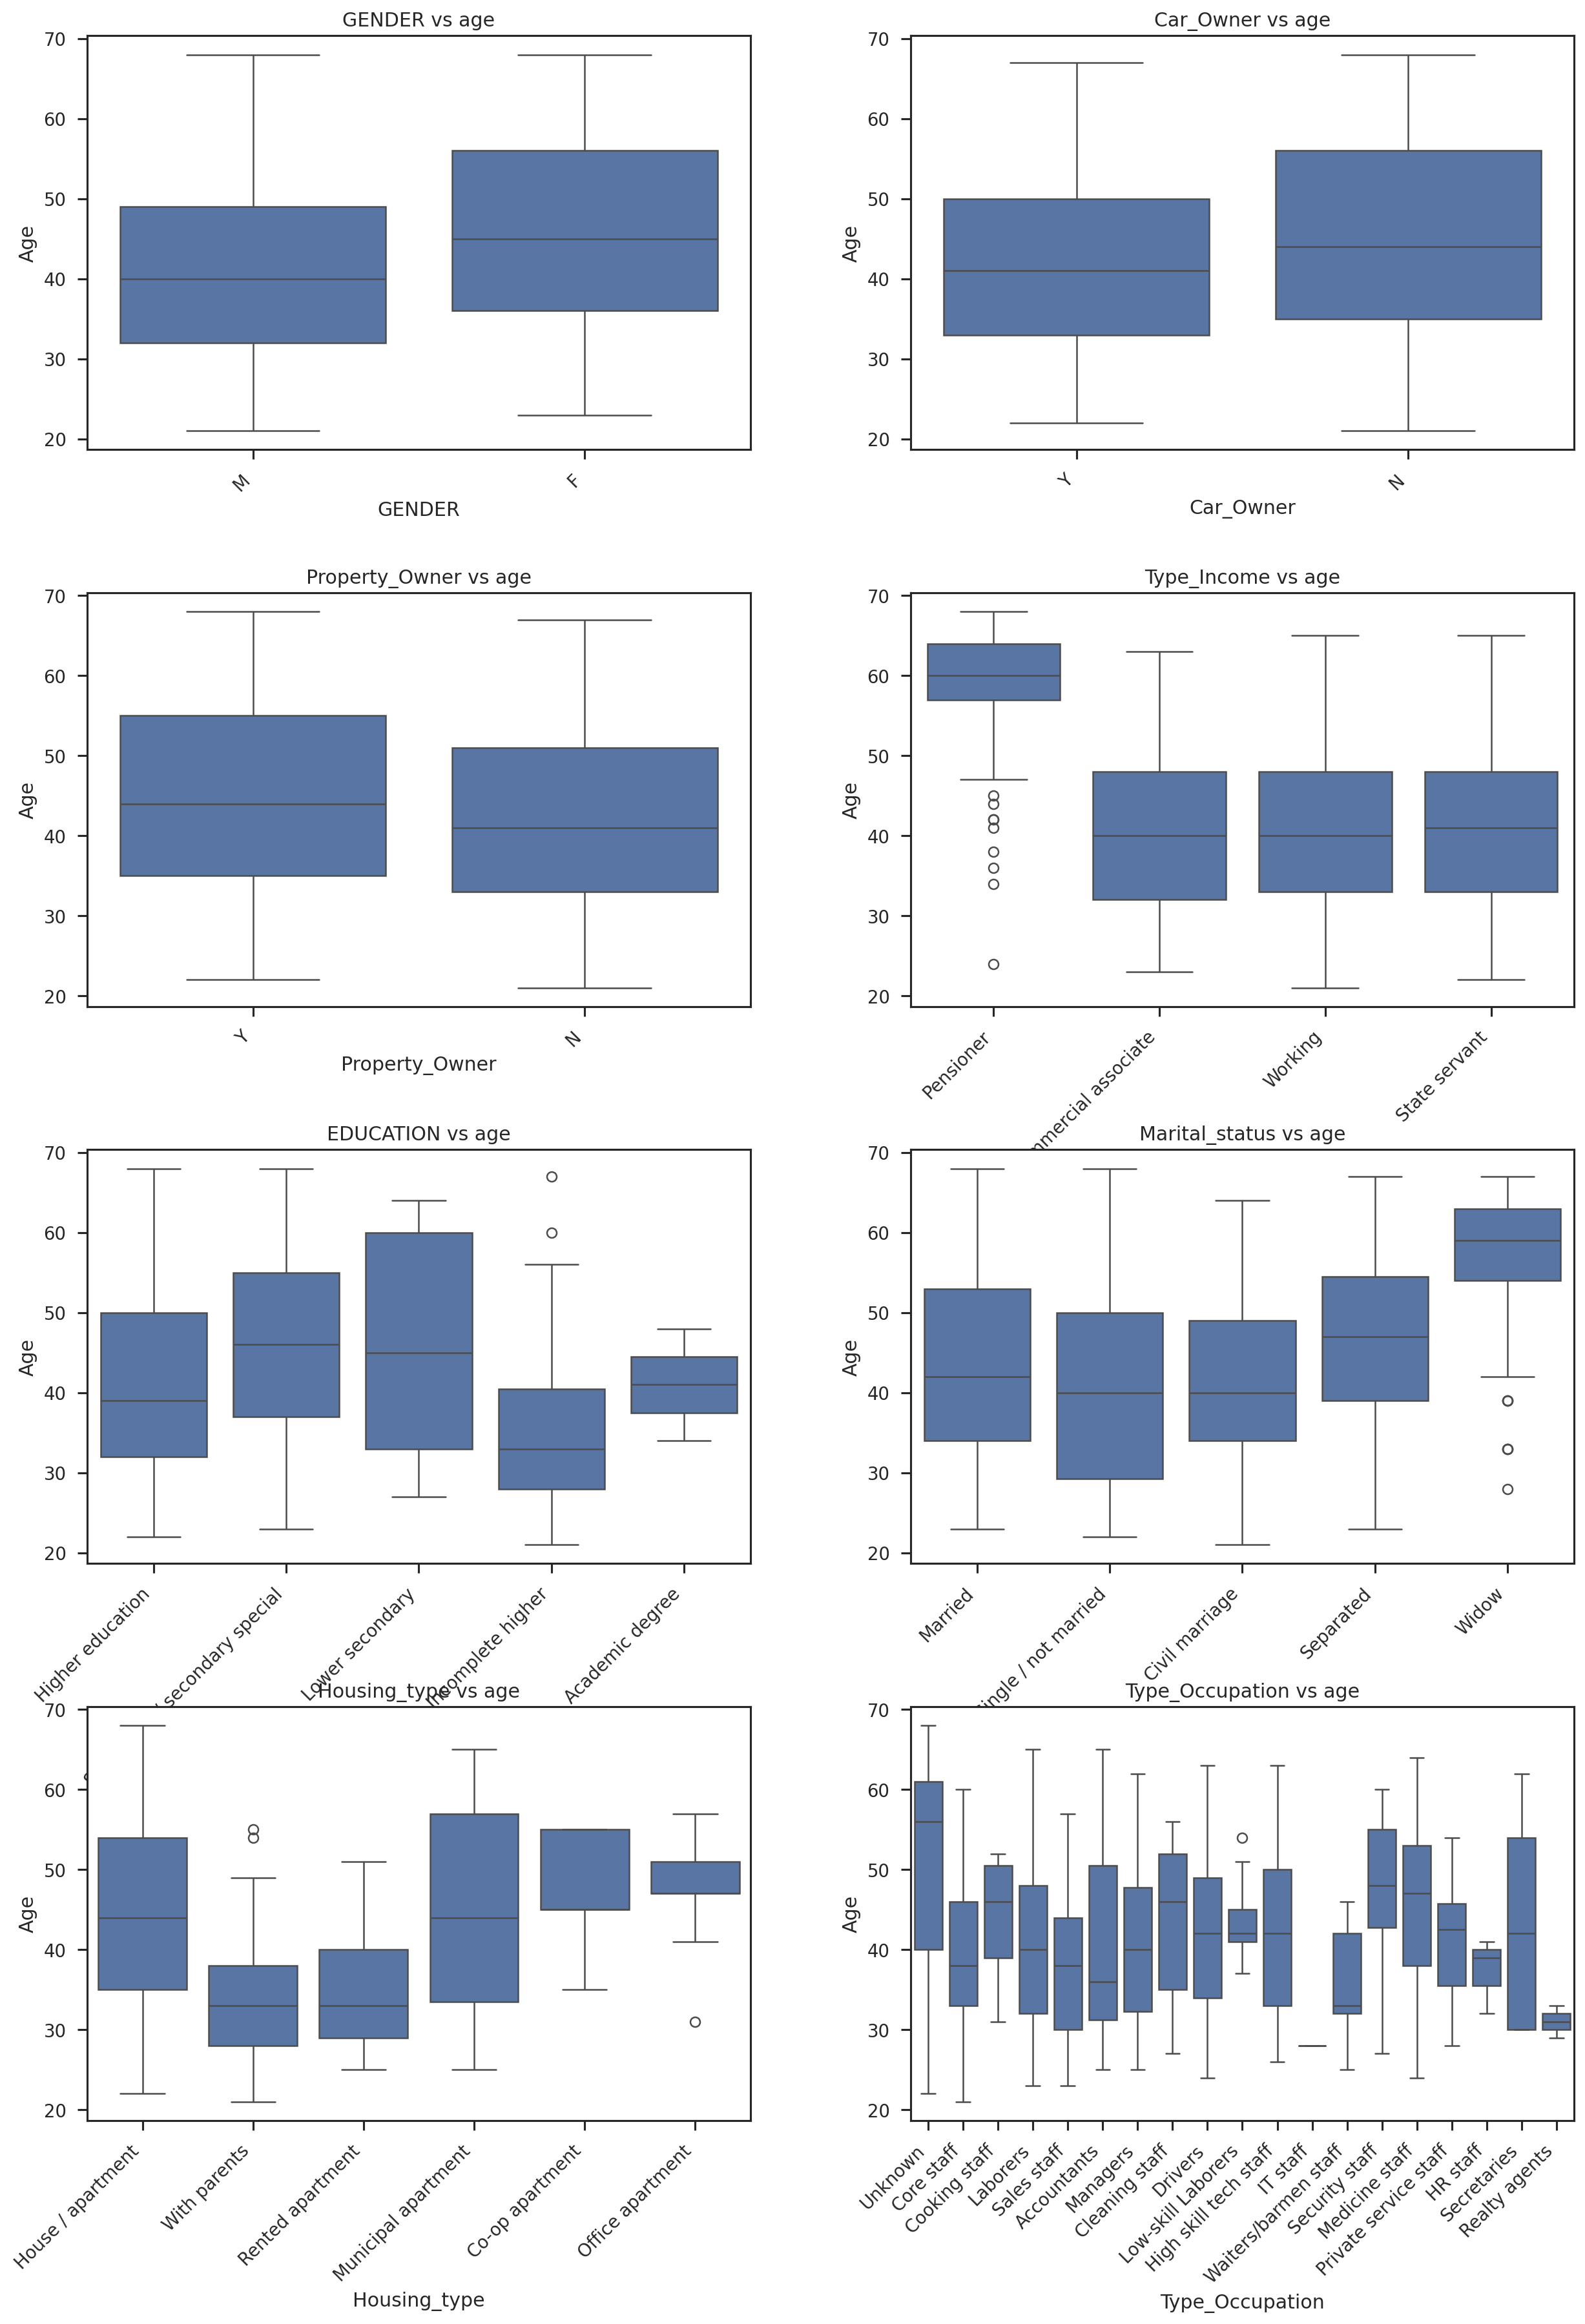

In [87]:
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=np.abs(data['Age']))
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs age")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Age')
            cat_ft_count += 1
    break

plt.show()

Interpretation:

Female applicants are older than their male counterpart.

Those who don't own a car tend to be older.

Those who own a property tend to be older than those who don't.

Of course, the pensioners are older that those who are working (We also see that some have pensioned at a young age, those are outliers).

It is also interesting to see that those who have not completed their higher education degree are younger in general than the other groups.

Obviously, the widows tend to be much older. We also see some outliers in their 30's as well.

With no surprise, those who live with parent tend to be younger. We also see some outlier as well.

Lastly, who work as security staff tend to be older while those who work in sales tend to be younger.

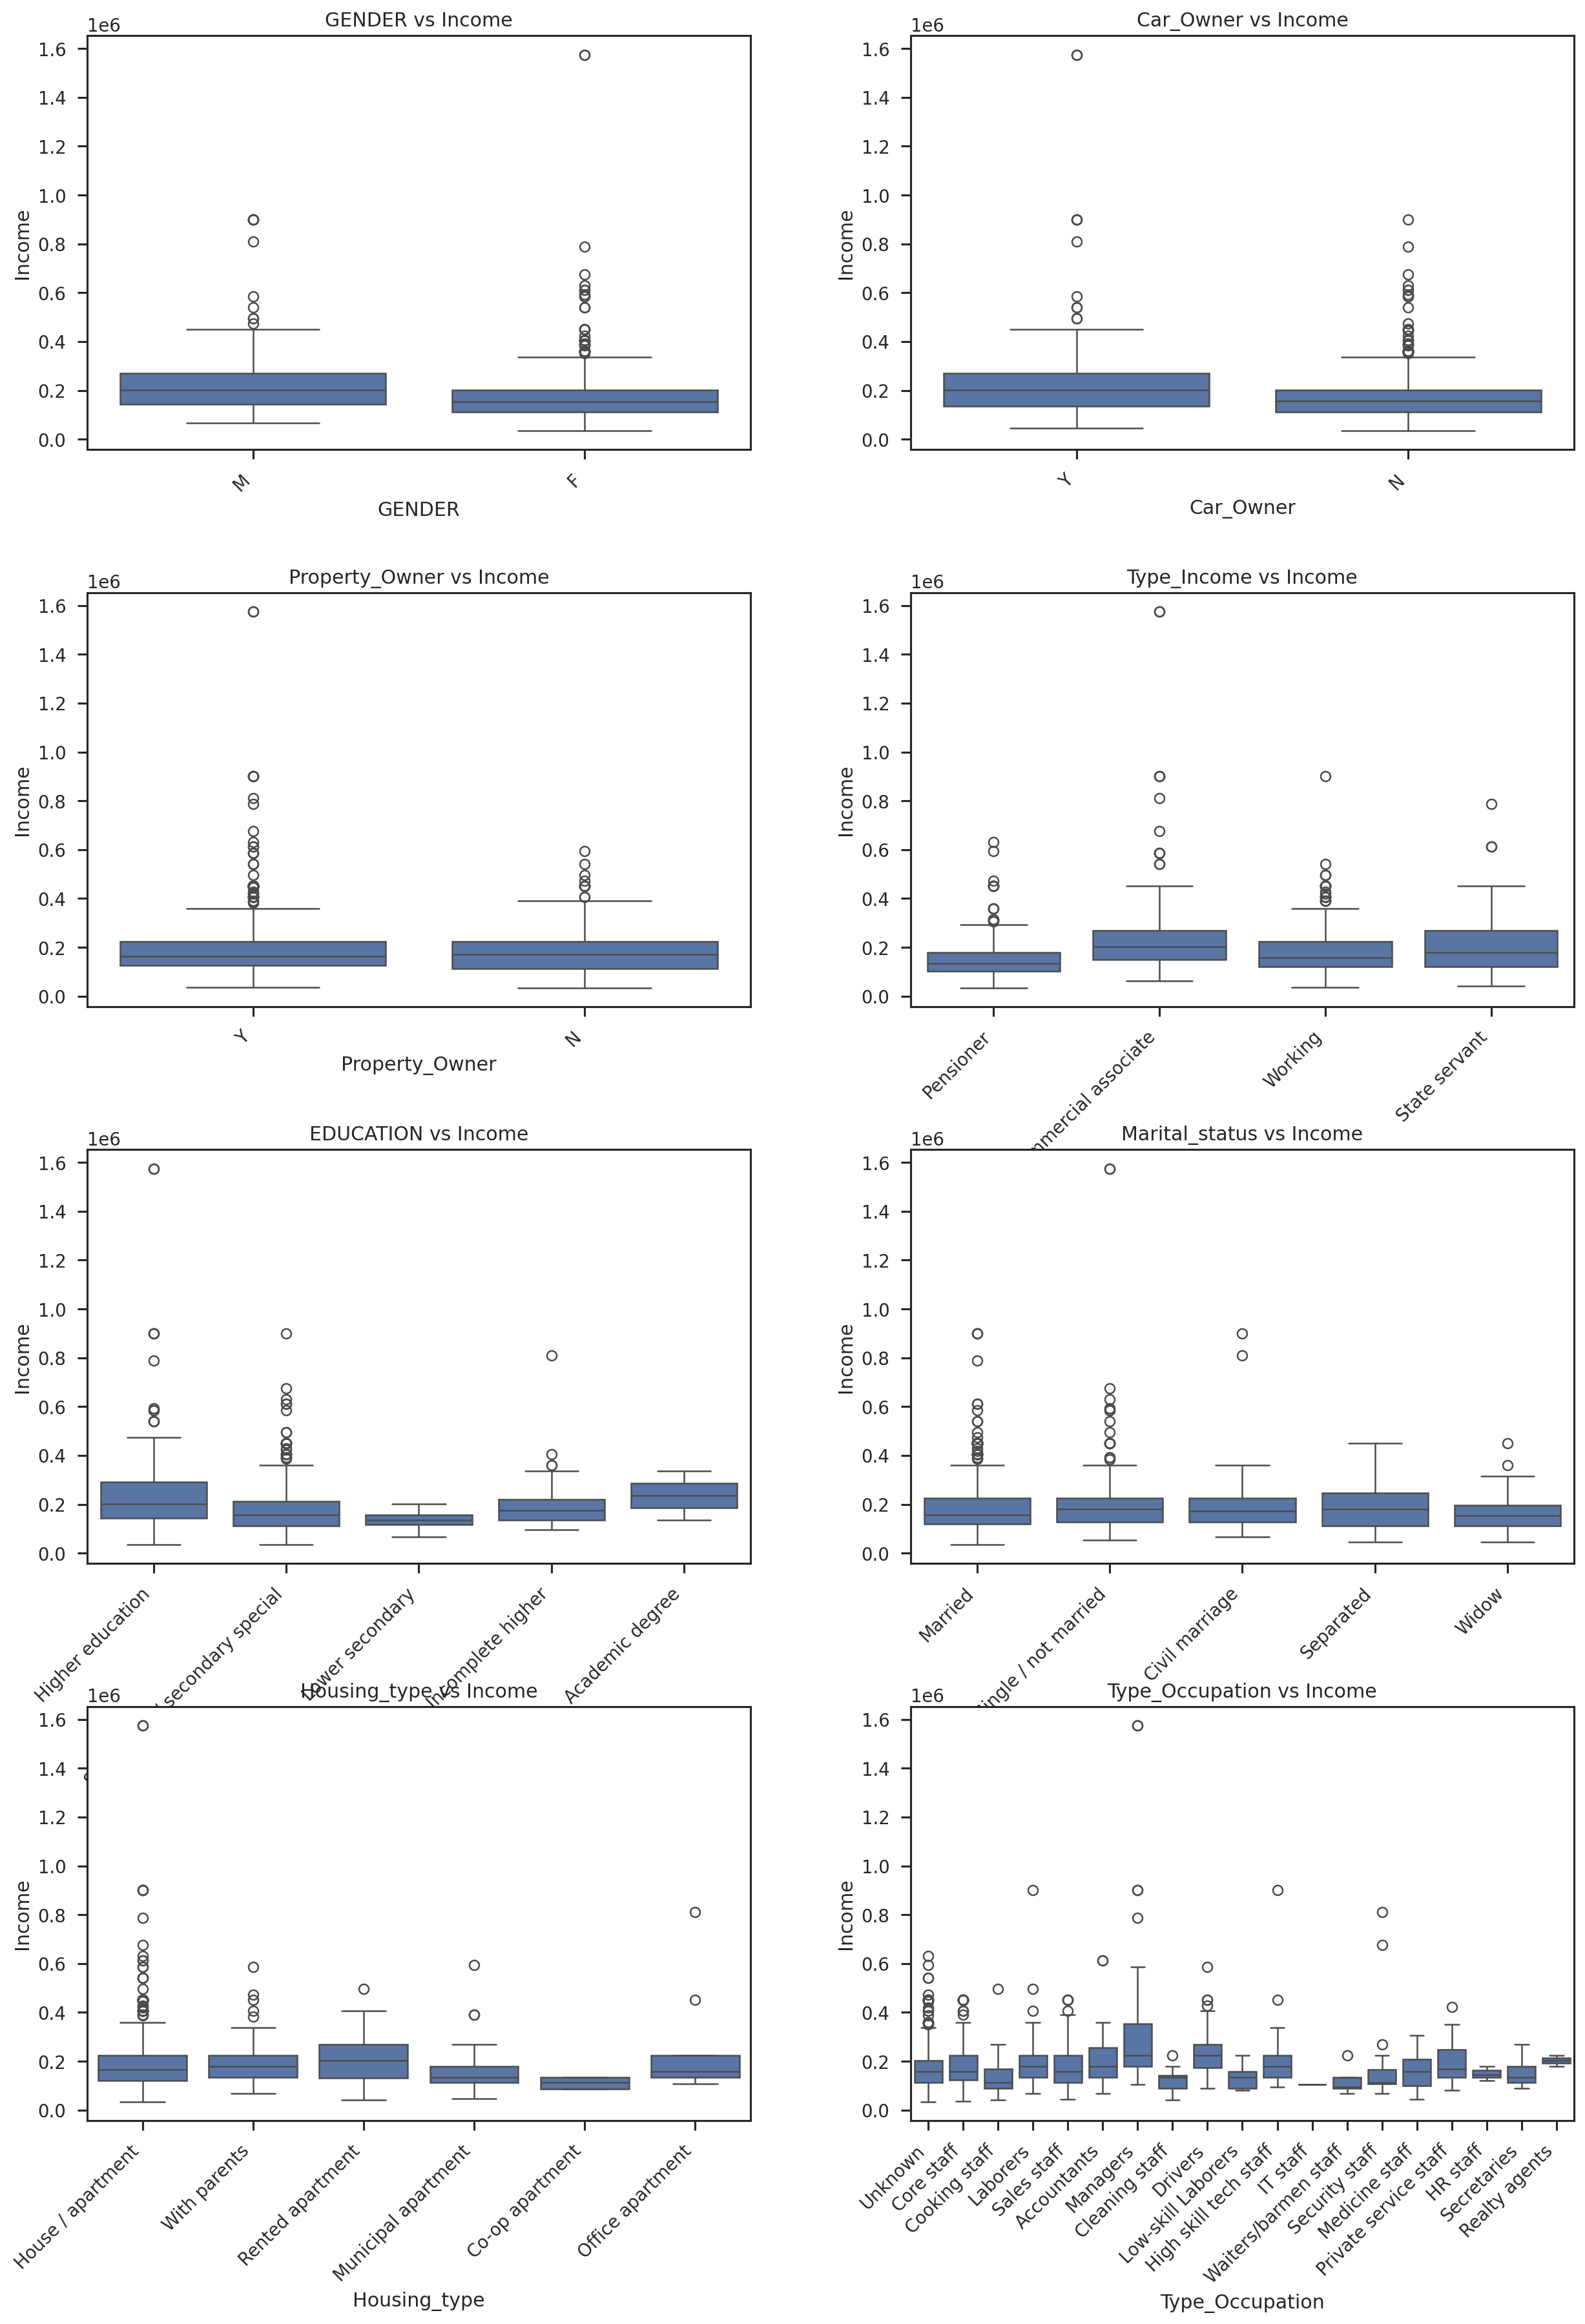

In [88]:
#Income vs rest of the catagorical data
fig, axes = plt.subplots(4,2,figsize=(15,20),dpi=180)
fig.tight_layout(pad=5.0)

cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']

for cat_ft_count, ax in enumerate(axes):
    for row_count in range(4):
        for feat_count in range(2):
            sns.boxplot(ax=axes[row_count,feat_count],x=data[cat_features[cat_ft_count]],y=data["Annual_income"])
            axes[row_count,feat_count].set_title(cat_features[cat_ft_count] + " vs Income")
            plt.sca(axes[row_count,feat_count])
            plt.xticks(rotation=45,ha='right')
            plt.ylabel('Income')
            cat_ft_count += 1
    break

plt.show()

Interpretation:

Commercial Associate applicant tend to have been employed longer than the rest.

Those who work in the managerial field, have been employed longer than the rest.

# Categorical vs categorical features (Chi-square test)
Null hypothesis: The feature's categories have no effect on the target variable

Alternative hypothesis (one or more) of the feature categories has a signifcant effect on the target valriable

In [89]:
data.columns

Index(['Experience', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_member_count', 'label'],
      dtype='object')

In [90]:
def chi_func(feature):
    # selection row with high risk
    label_feature = data[data['label'] == 1][feature]
    label_feature_cat = pd.crosstab(index=label_feature, columns=['Count']).rename_axis(None, axis=1)
    # drop the index feature name
    label_feature_cat.index.name = None
    # observed values
    obs = label_feature_cat
    print('Observed values:\n')
    print(obs)
    print('\n')
    # expected values
    print(obs.index)
    exp = pd.DataFrame([obs['Count'].sum()/len(obs)] * len(obs.index),columns=['Count'], index=obs.index)
    print('Expected values:\n')
    print(exp)
    print('\n')
    # chi-square test
    chi_squared_stat = (((obs-exp)**2)/exp).sum()
    print('Chi-square:\n')
    print(chi_squared_stat[0])
    print('\n')
    #critical value
    crit = stats.chi2.ppf(q = 0.95, df = len(obs) - 1)
    print('Critical value:\n')
    print(crit)
    print('\n')
    # p-value
    p_value = 1 - stats.chi2.cdf(x = chi_squared_stat, df = len(obs) - 1)
    print('P-value:\n')
    print(p_value)

In [91]:
cat_features = ['GENDER', 'Car_Owner', 'Property_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
for ft in cat_features:
    print('\n\n**** {} ****\n'.format(ft))
    chi_func(ft)



**** GENDER ****

Observed values:

   Count
F     89
M     71


Index(['F', 'M'], dtype='object')
Expected values:

   Count
F  80.00
M  80.00


Chi-square:

2.025


Critical value:

3.841458820694124


P-value:

[0.15472892]


**** Car_Owner ****

Observed values:

   Count
N    101
Y     59


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

11.025


Critical value:

3.841458820694124


P-value:

[0.00089891]


**** Property_Owner ****

Observed values:

   Count
N     58
Y    102


Index(['N', 'Y'], dtype='object')
Expected values:

   Count
N  80.00
Y  80.00


Chi-square:

12.1


Critical value:

3.841458820694124


P-value:

[0.00050422]


**** Type_Income ****

Observed values:

                      Count
Commercial associate     46
Pensioner                37
State servant             5
Working                  72


Index(['Commercial associate', 'Pensioner', 'State servant', 'Working'], dtype='object')
Expected values:

          

# Business findings from the EDA
Typical profile of an applicant is: a Female in her early 40’s, married with a partner and no child. She has been employed for 5 years with a salary of 166050. She has completed her secondary education. She does not own a car but owns a property (a house/ apartment).

Age and income do not have any effects on the target variable

Those who are flagged as bad client, tend to have a shorter Experience. They also constitute less than 2% of total applicants.

# Preparing Data for ML

Transformation To be done On Each Feature:
Data Cleaning
Feature Selection

DROP Features

Why are we droping these features?  

ID: ID is not useful for prediction, it helped us when we were merging the two datasets but after that, there is no need to keep it.

Mobile_phone: Since everyone has a mobile phone, this feature does not inform us about anything.

Children : is highly correlated with Family member count, and to avoid multicollinearity, we drop it.

Type_Occupation: Has some missing values and the count of each category is not very different to justify the use of mode. So we drop it.

In [92]:
data_ml_full= df.copy()

**Split the data into training and test sets, creating a copy of the datasets**

In [93]:
train_data_ml, test_data_ml = train_test_split(data_ml_full, test_size=0.2, random_state=42)

In [94]:
train_data_ml

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
680,5045113,F,N,Y,0,202500.00,Pensioner,Secondary / secondary special,Widow,House / apartment,-21126.00,365243,1,0,0,0,NaN,1,0
1079,5142781,M,Y,N,2,157500.00,Working,Secondary / secondary special,Separated,With parents,-13979.00,-1626,1,0,0,0,Laborers,3,0
1190,5113711,F,Y,Y,1,405000.00,State servant,Secondary / secondary special,Married,House / apartment,-16962.00,-407,1,0,1,1,Laborers,3,0
864,5069117,F,N,Y,0,180000.00,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-20577.00,365243,1,0,0,0,NaN,1,0
743,5117561,F,N,N,0,135000.00,Working,Secondary / secondary special,Married,House / apartment,NaN,-645,1,1,0,0,Laborers,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,5089632,F,N,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-16188.00,-309,1,1,1,1,Sales staff,2,0
1294,5010498,M,Y,Y,1,202500.00,Working,Secondary / secondary special,Married,House / apartment,-10218.00,-313,1,1,0,0,NaN,3,0
860,5021879,M,Y,N,2,112500.00,Working,Secondary / secondary special,Married,House / apartment,-13095.00,-217,1,0,1,0,Laborers,4,0
1459,5068324,F,N,Y,0,171000.00,Working,Higher education,Married,House / apartment,-18348.00,-3853,1,0,0,0,High skill tech staff,2,0


In [95]:
test_data_ml

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
30,5029028,F,N,Y,0,90000.00,Working,Lower secondary,Single / not married,Rented apartment,-12026.00,-4770,1,0,0,0,Cleaning staff,2,1
1514,5051097,F,N,N,0,69750.00,Pensioner,Secondary / secondary special,Widow,Municipal apartment,-21986.00,365243,1,0,1,0,NaN,1,0
1182,5028990,F,N,N,2,81000.00,Working,Lower secondary,Single / not married,House / apartment,-15373.00,-2333,1,0,0,0,Sales staff,3,0
1205,5145968,F,N,Y,0,112500.00,Pensioner,Secondary / secondary special,Widow,House / apartment,-23018.00,365243,1,0,0,0,NaN,1,0
528,5052755,M,N,Y,0,225000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-10570.00,-1175,1,0,0,0,Managers,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5078805,F,N,Y,0,306000.00,Working,Secondary / secondary special,Married,House / apartment,-18927.00,-2978,1,0,0,0,High skill tech staff,2,0
1065,5029529,M,Y,Y,0,112500.00,Pensioner,Lower secondary,Married,House / apartment,-21719.00,365243,1,0,1,0,NaN,2,0
1345,5146002,M,Y,Y,0,225000.00,Working,Secondary / secondary special,Single / not married,House / apartment,-10177.00,-189,1,0,0,1,Managers,1,0
485,5062713,F,N,Y,1,157500.00,Working,Secondary / secondary special,Married,House / apartment,-14510.00,-3805,1,0,0,0,Core staff,3,0


In [96]:
data_ml= train_data_ml.copy()

In [97]:
data.columns

Index(['Experience', 'GENDER', 'Car_Owner', 'Property_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Age', 'Mobile_phone', 'Work_Phone', 'Phone',
       'EMAIL_ID', 'Type_Occupation', 'Family_member_count', 'label'],
      dtype='object')

In [98]:
data_ml.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)

In [99]:
data_ml.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birthday_count',
       'Employed_days', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members',
       'label'],
      dtype='object')

In [100]:
#Converting Birthday_Count in days to years
data_ml['Birthday_count'] = abs(data_ml['Birthday_count'] / 365)
data_ml['Birthday_count'] = data_ml['Birthday_count'].round()

In [101]:
# Convert the "Employed_days" column from days to years and make negative values positive
data_ml['Employed_days'] = abs(data_ml['Employed_days'] / 365.25)
data_ml['Employed_days'] = round(data_ml['Employed_days'], 1)

In [102]:
data_ml= data_ml.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [103]:
data_ml= data_ml.dropna()

Feature Encoding

GENDER - [Nominal Data]

Car_Owner - [Nominal Data]

Work_Phone - [Nominal Data]

Marital_Status - [Nominal Data]

Housing_type - [Nominal Data]

Type_Income - [Nominal Data]

As all of these data are Nominal we will use the Pd.get_dummies [Dummy Variable] to convert them into the Numerical Values and will use the drop_first function of the get_dummies function to get rid of the dummy trap .



In [104]:
data_encoded = data_ml.copy()


In [105]:
dummy_features = pd.get_dummies(data_encoded[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml= data_ml.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml = pd.concat([data_ml,dummy_features],axis=1)

In [106]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml['Education_level_Encoded'] = encoder.fit_transform(data_ml[['EDUCATION']])
# drop the original Education_level column
data_ml.drop('EDUCATION', axis=1, inplace=True)

In [107]:
# Replacing the 1000 in Employed Years with np.NaN and
# Will do the Imputations
data_ml["Employed_Years"] = data_ml["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/1198 with 1 missing, elapsed time: 0.305
Imputing row 101/1198 with 0 missing, elapsed time: 0.306
Imputing row 201/1198 with 0 missing, elapsed time: 0.308
Imputing row 301/1198 with 0 missing, elapsed time: 0.309
Imputing row 401/1198 with 0 missing, elapsed time: 0.310
Imputing row 501/1198 with 0 missing, elapsed time: 0.311
Imputing row 601/1198 with 0 missing, elapsed time: 0.312
Imputing row 701/1198 with 0 missing, elapsed time: 0.313
Imputing row 801/1198 with 0 missing, elapsed time: 0.314
Imputing row 901/1198 with 0 missing, elapsed time: 0.315
Imputing row 1001/1198 with 1 missing, elapsed time: 0.316
Imputing row 1101/1198 with 0 missing, elapsed time: 0.318


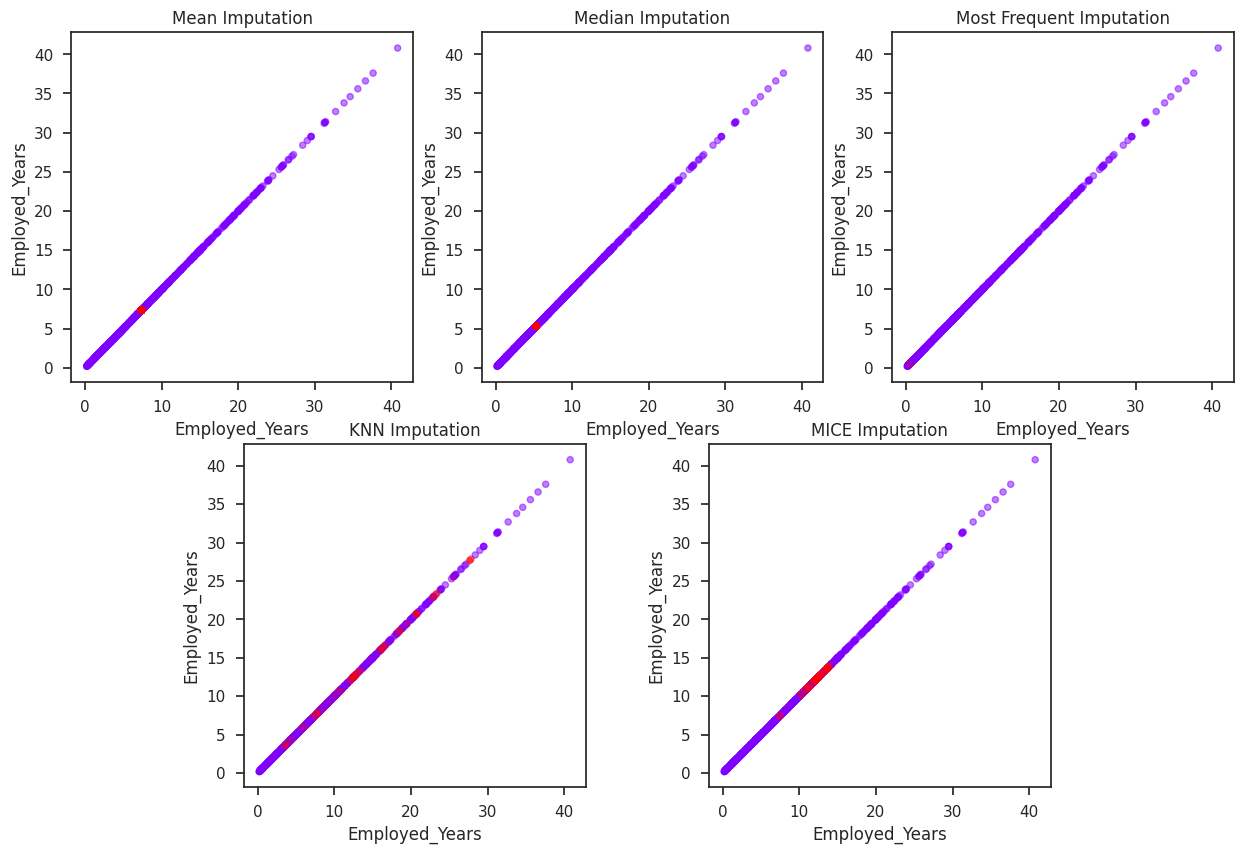

In [108]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
imputer_median = data_ml.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
from sklearn.impute import SimpleImputer
imputer_mode = data_ml.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
imputer_knn = data_ml.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml['Employed_Years'].isnull() + data_ml['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

In [109]:
data_ml= imputer_knn.copy()

Handeling Outliers


<Axes: >

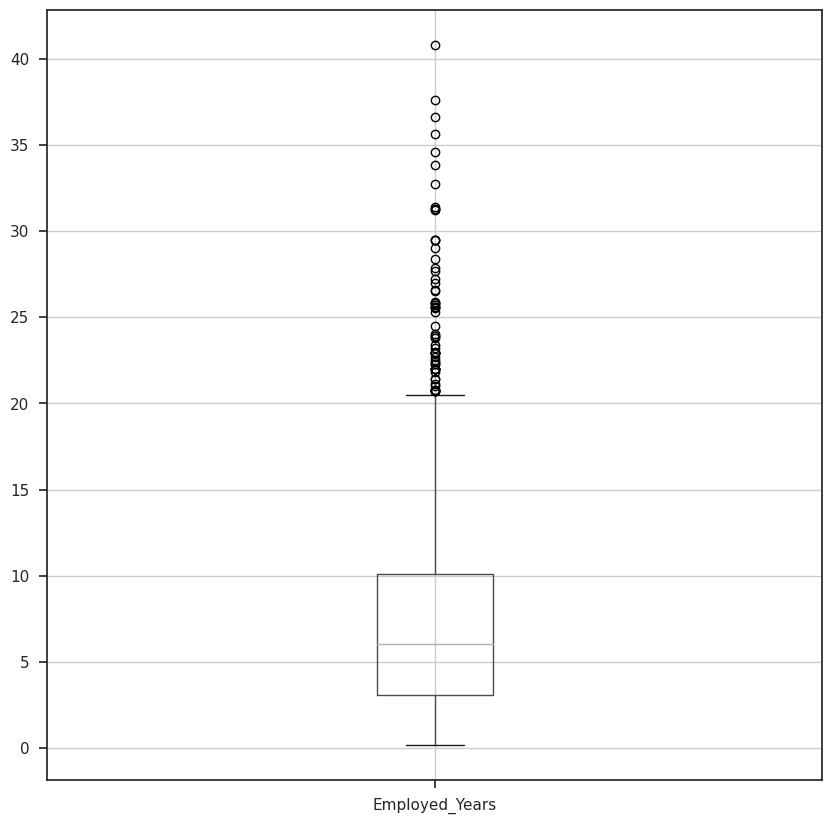

In [110]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

In [111]:
df_out = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_member_count","Annual_income"])

In [112]:
outliers_list = ["Family_member_count","Annual_income","Employed_Years"]

In [113]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [114]:
for i in outliers_list:
    data_ml[i] = ohiqr(df_out[i])

<Axes: >

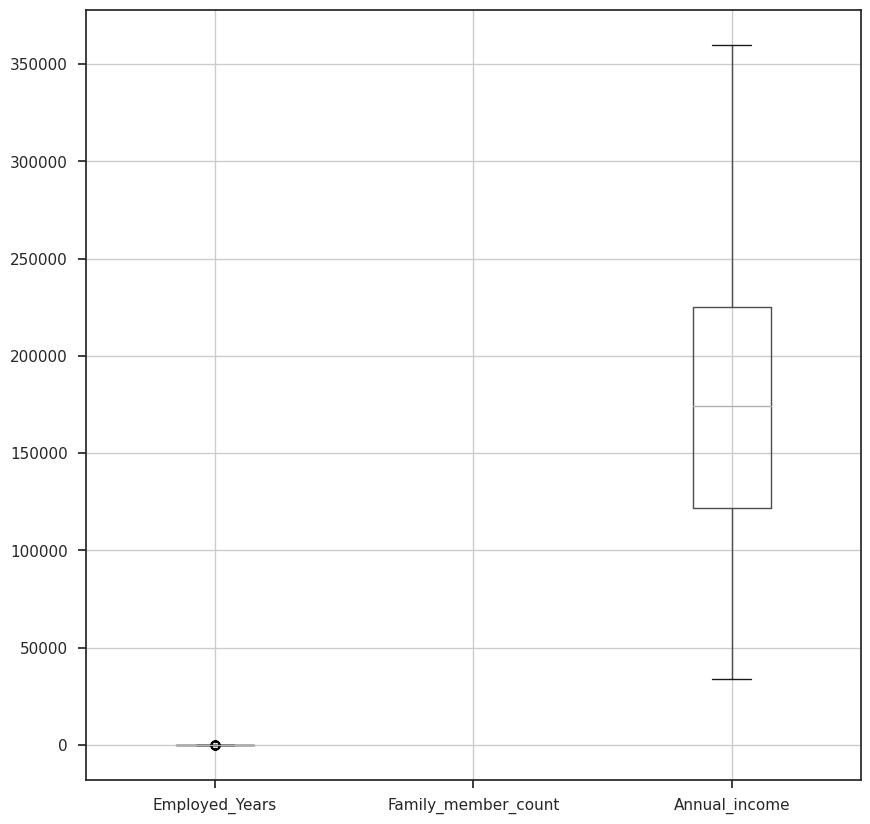

In [115]:
df_o = pd.DataFrame(data = data_ml, columns = ["Employed_Years","Family_member_count","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

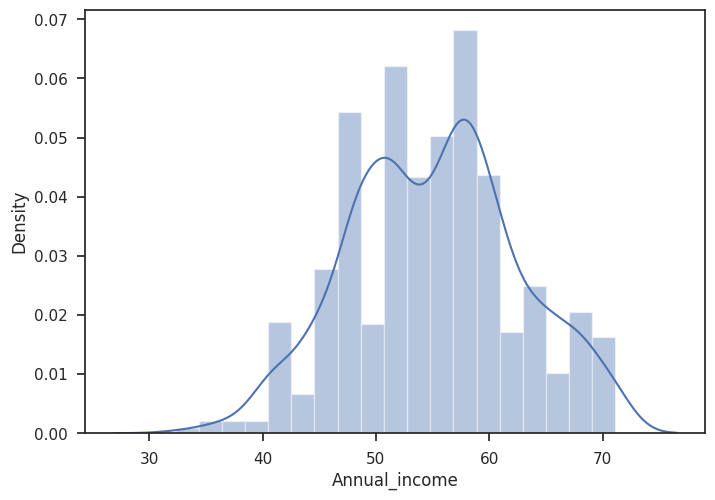

In [116]:
# cube root transformation
data_ml['Annual_income'] = np.cbrt(data_ml['Annual_income'])
sns.distplot(data_ml['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

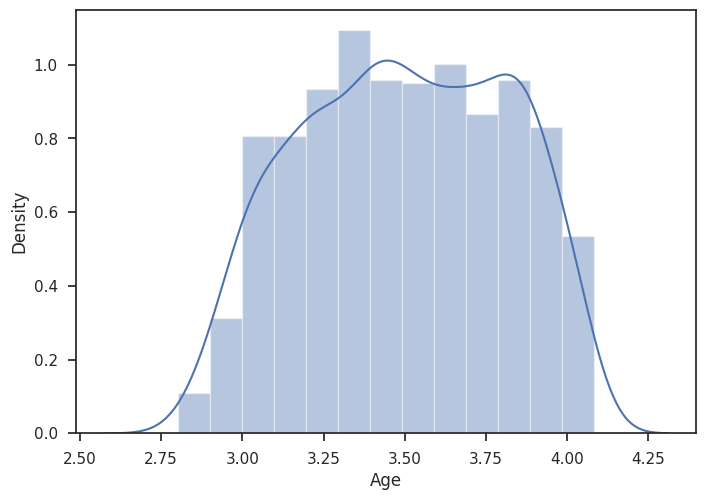

In [117]:
# cube root transformation
data_ml['Age'] = np.cbrt(data_ml['Age'])
sns.distplot(data_ml['Age'])

In [118]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml[cols_to_scale] = scaler.fit_transform(data_ml[cols_to_scale])

# Check the scaled columns
print(data_ml[cols_to_scale])

      Age  Annual_income  Employed_Years
680  0.84           0.68            0.27
1079 0.44           0.56            0.21
1190 0.61           0.66            0.04
864  0.80           0.62            0.52
233  0.18           0.66            0.33
...   ...            ...             ...
1130 0.57           0.92            0.03
1294 0.18           0.68            0.03
860  0.39           0.41            0.02
1459 0.69           0.60            0.51
1126 0.18           0.41            0.06

[1198 rows x 3 columns]


In [119]:
data_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 680 to 1126
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Annual_income            1198 non-null   float64
 1   Age                      1198 non-null   float64
 2   Employed_Years           1198 non-null   float64
 3   Phone                    1198 non-null   float64
 4   EMAIL_ID                 1198 non-null   float64
 5   Family_Members           1198 non-null   float64
 6   label                    1198 non-null   float64
 7   Work_Phone               1198 non-null   float64
 8   Male                     1198 non-null   float64
 9   Car                      1198 non-null   float64
 10  Property                 1198 non-null   float64
 11  Married                  1198 non-null   float64
 12  Separated                1198 non-null   float64
 13  Single                   1198 non-null   float64
 14  Widow                 

In [120]:
data_ml['label'] = pd.to_numeric(data_ml['label'])

In [121]:
data_ml = data_ml.drop(columns=['Family_member_count'])

In [122]:
data_ml.columns

Index(['Annual_income', 'Age', 'Employed_Years', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'Work_Phone', 'Male', 'Car', 'Property',
       'Married', 'Separated', 'Single', 'Widow', 'Apartment',
       'Municipal_Apartment', 'Office_Apartment', 'Rented_Apartment',
       'Living_With_Parents', 'Pensioner', 'State_Servent', 'Working',
       'Education_level_Encoded'],
      dtype='object')

In [123]:
oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml.loc[:, data_ml.columns != 'label'],data_ml['label'])
data_ml = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [124]:
# split the train data into X and y (target)
X_train, y_train = data_ml.loc[:, data_ml.columns != 'label'], data_ml['label'].astype('int64')

# **Repeating all Preprocessing steps on Test Data also**

In [125]:
data_ml_test= test_data_ml.copy()

In [126]:
data_ml_test.drop(["Ind_ID","Mobile_phone","CHILDREN", "Type_Occupation"],axis=1,inplace=True)

In [127]:
#Converting Birthday_Count in days to years
data_ml_test['Birthday_count'] = abs(data_ml_test['Birthday_count'] / 365)
data_ml_test['Birthday_count'] = data_ml_test['Birthday_count'].round()

In [128]:
# Convert the "Employed_days" column from days to years and make negative values positive
data_ml_test['Employed_days'] = abs(data_ml_test['Employed_days'] / 365.25)
data_ml_test['Employed_days'] = round(data_ml_test['Employed_days'], 1)

In [129]:
data_ml_test= data_ml_test.rename(columns={
    'Birthday_count'    :'Age',
    'Employed_days'     :'Employed_Years',
    })

In [130]:
data_ml_test= data_ml_test.dropna()

In [131]:
data_encoded_test = data_ml_test.copy()


In [132]:
dummy_features = pd.get_dummies(data_encoded_test[["GENDER","Car_Owner","Propert_Owner","Work_Phone","Marital_status","Housing_type","Type_Income"]],drop_first=True)
dummy_features = dummy_features.rename(columns={"Work_Phone" :"Work_Phone",
                          "GENDER_M"         :"Male",
                          "Car_Owner_Y"      :"Car",
                          "Propert_Owner_Y" :"Property",
                          "Marital_status_Married" : "Married",
                          "Marital_status_Separated":"Separated",
                          "Marital_status_Single / not married":"Single",
                          "Marital_status_Widow" : "Widow",
                          "Housing_type_House / apartment":"Apartment",
                          'Housing_type_Municipal apartment' :"Municipal_Apartment",
                          "Housing_type_Office apartment":"Office_Apartment",
                          "Housing_type_Rented apartment" :"Rented_Apartment",
                          "Housing_type_With parents" :"Living_With_Parents",
                          "Type_Income_Pensioner"  : "Pensioner",
                          "Type_Income_State servant":"State_Servent",
                          "Type_Income_Working"   : "Working"
                         })
data_ml_test= data_ml_test.drop(["GENDER","Car_Owner","Work_Phone",
                    "Propert_Owner","Marital_status","Housing_type","Type_Income"],axis=1)

data_ml_test = pd.concat([data_ml_test,dummy_features],axis=1)

In [133]:
from sklearn.preprocessing import OrdinalEncoder
# create an instance of the encoder
encoder = OrdinalEncoder(categories=[['Lower secondary', 'Incomplete higher', 'Secondary / secondary special', 'Higher education', 'Academic degree']])
# encode the Education_level feature
data_ml_test['Education_level_Encoded'] = encoder.fit_transform(data_ml_test[['EDUCATION']])
# drop the original Education_level column
data_ml_test.drop('EDUCATION', axis=1, inplace=True)

In [134]:
# Replacing the 1000 in Employed Years with np.NaN and
# Will do the Imputations
data_ml_test["Employed_Years"] = data_ml_test["Employed_Years"].replace(1000,np.NaN)

Imputing row 1/298 with 0 missing, elapsed time: 0.031
Imputing row 101/298 with 0 missing, elapsed time: 0.033
Imputing row 201/298 with 0 missing, elapsed time: 0.035


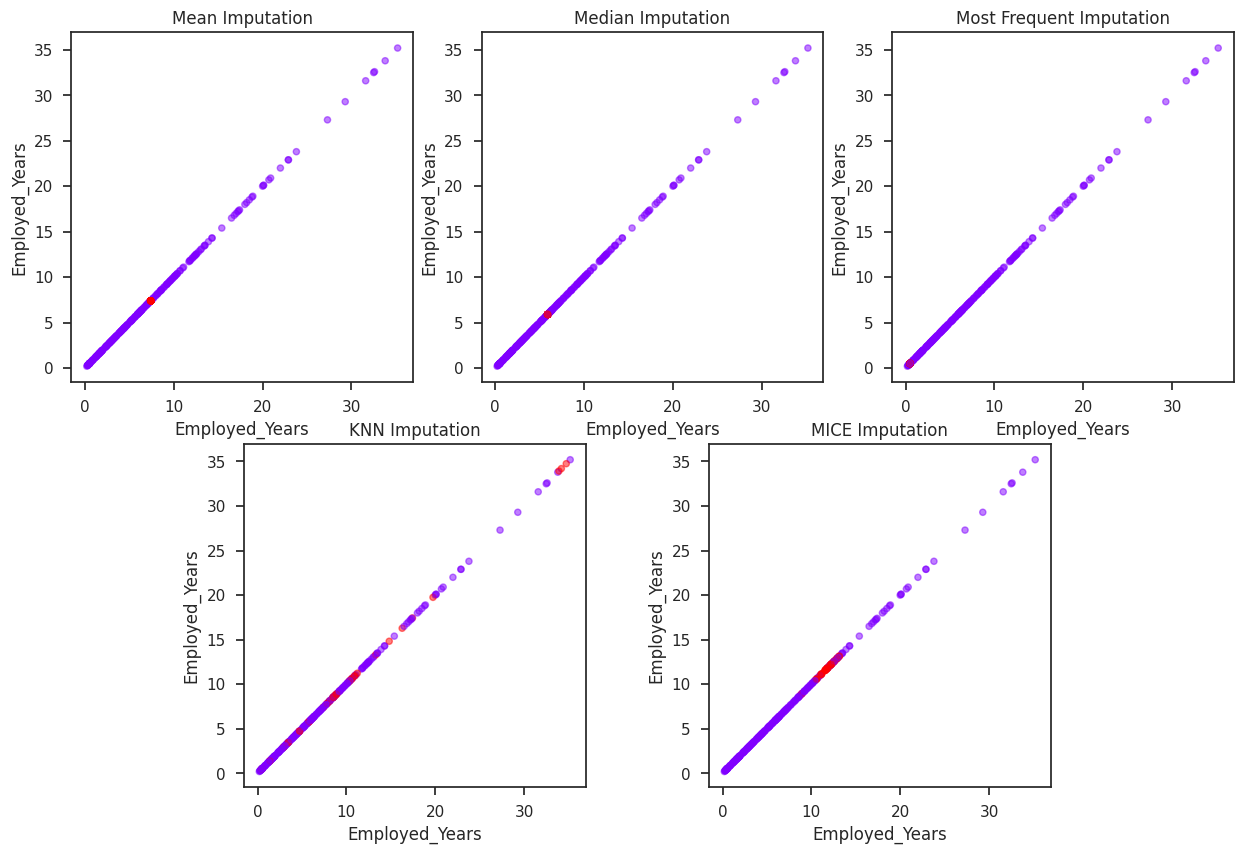

In [135]:
#Mean Imputation
from sklearn.impute import SimpleImputer
imputer_mean = data_ml_test.copy()
mean_imputer = SimpleImputer(strategy="mean")
imputer_mean.iloc[:,:] = mean_imputer.fit_transform(imputer_mean)

#Median Imputation
from sklearn.impute import SimpleImputer
imputer_median = data_ml_test.copy()
median_imputer = SimpleImputer(strategy="median")
imputer_median.iloc[:,:] = median_imputer.fit_transform(imputer_median)
imputer_median

#Mode Imputation
from sklearn.impute import SimpleImputer
imputer_mode = data_ml_test.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
imputer_mode.iloc[:,:] = mode_imputer.fit_transform(imputer_mode)
imputer_mode

#KNN imputation
from fancyimpute import KNN
knn_imputer = KNN()
imputer_knn = data_ml_test.copy()
imputer_knn.iloc[:,:] = knn_imputer.fit_transform(imputer_knn)
imputer_knn

# MICE Imputation
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
imputer_MICE = data_ml_test.copy(deep=True)
imputer_MICE.iloc[:, :] = MICE_imputer.fit_transform(imputer_MICE)

fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = data_ml_test['Employed_Years'].isnull() + data_ml_test['Age'].isnull()
imputations = {'Mean Imputation': imputer_mean,
               'Median Imputation': imputer_median,
               'Most Frequent Imputation': imputer_mode,
               'KNN Imputation': imputer_knn,
              'MICE Imputation': imputer_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Employed_Years',y="Employed_Years",kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

In [136]:
data_ml_test= imputer_knn.copy()

<Axes: >

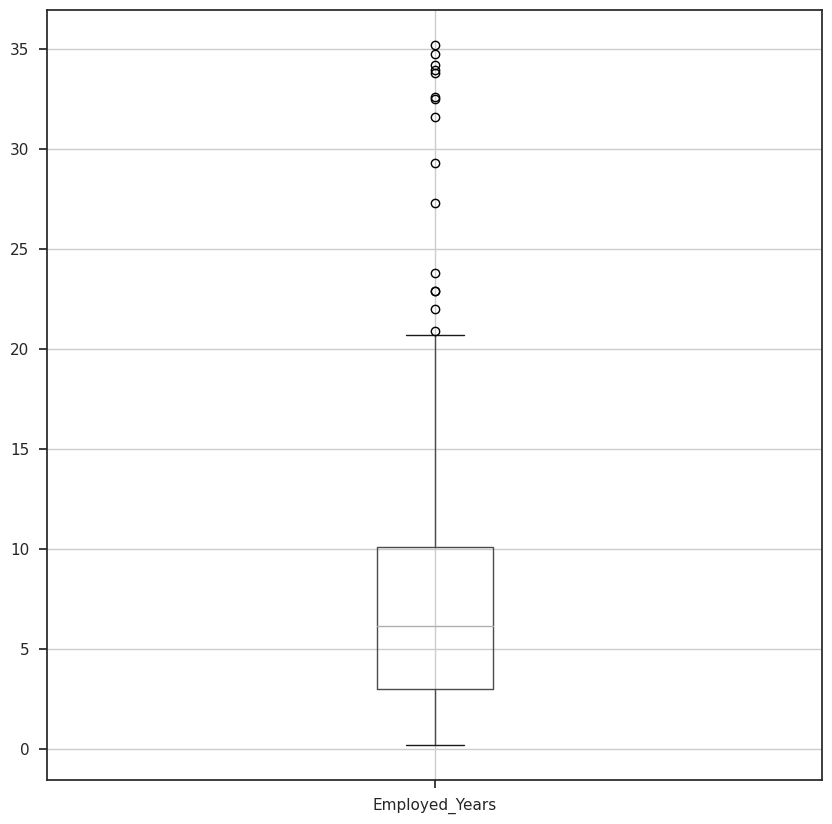

In [137]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years"])
df_o.boxplot(figsize=(10,10))

<Axes: >

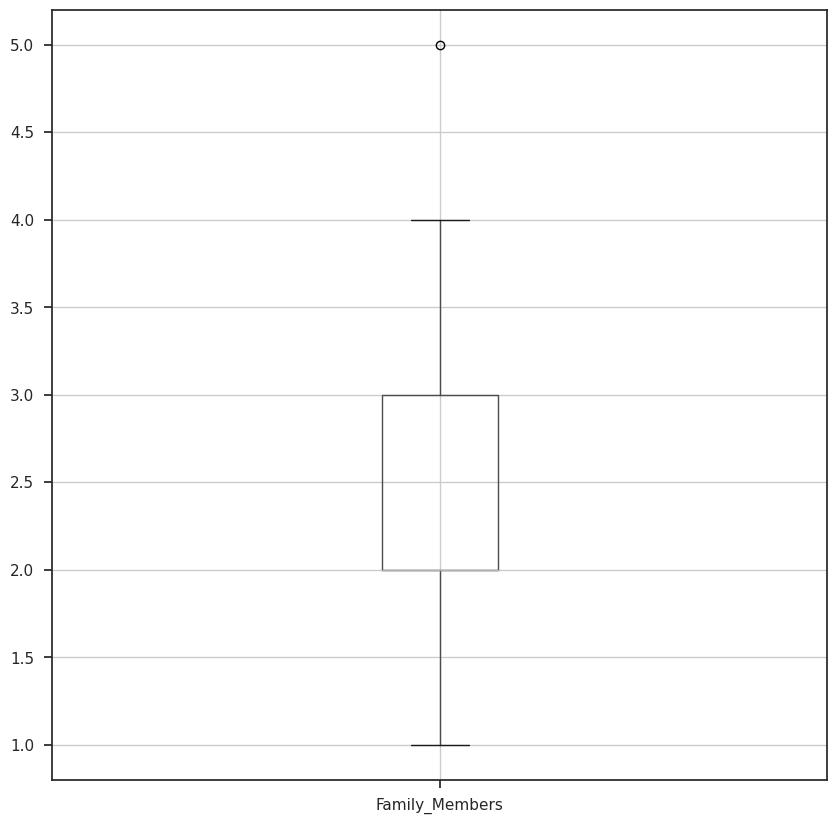

In [138]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Family_Members"])
df_o.boxplot(figsize=(10,10))

<Axes: >

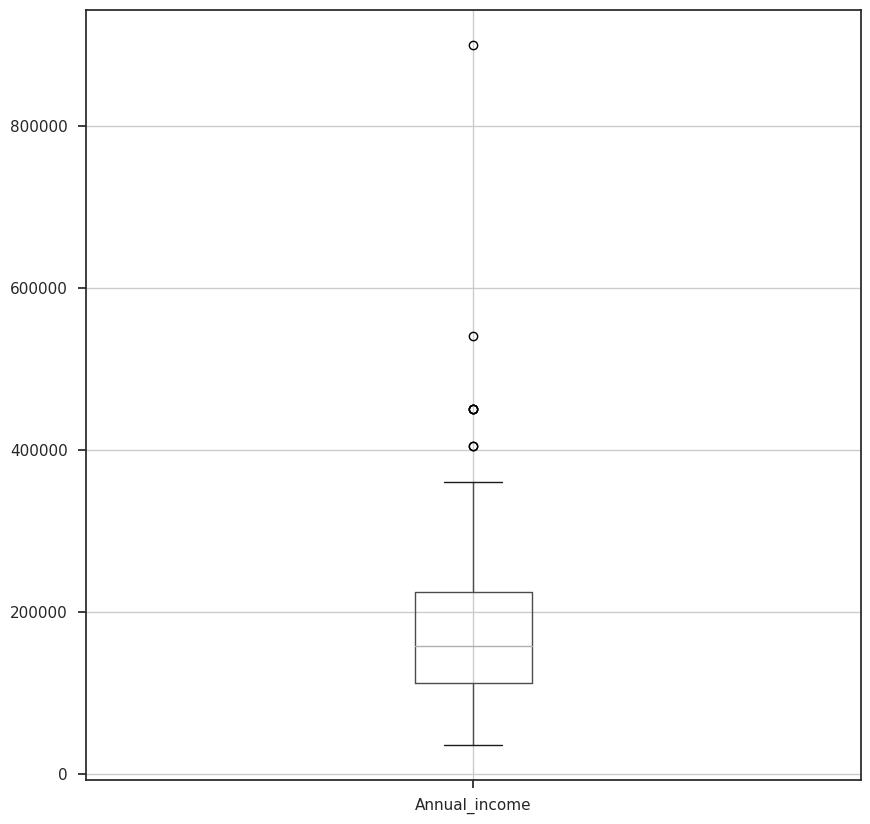

In [139]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Annual_income"])
df_o.boxplot(figsize=(10,10))

In [140]:
df_out = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])

In [141]:
outliers_list = ["Family_Members","Annual_income","Employed_Years"]

In [142]:
def ohiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [143]:
for i in outliers_list:
    data_ml_test[i] = ohiqr(df_out[i])

<Axes: >

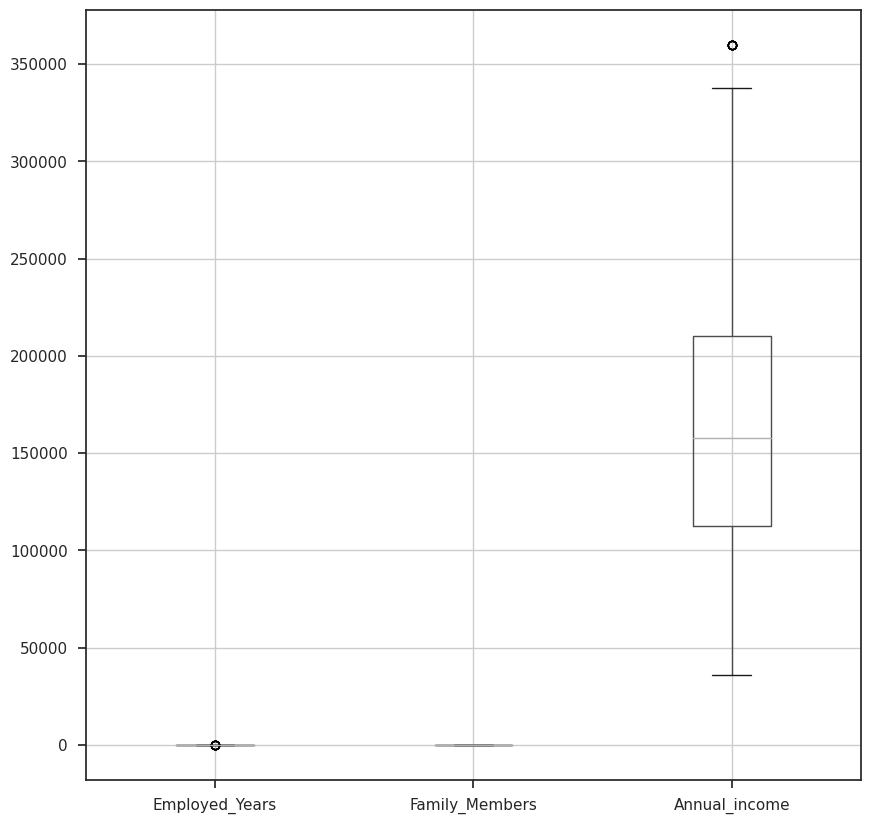

In [144]:
df_o = pd.DataFrame(data = data_ml_test, columns = ["Employed_Years","Family_Members","Annual_income"])
df_o.boxplot(figsize=(10,10))

<Axes: xlabel='Annual_income', ylabel='Density'>

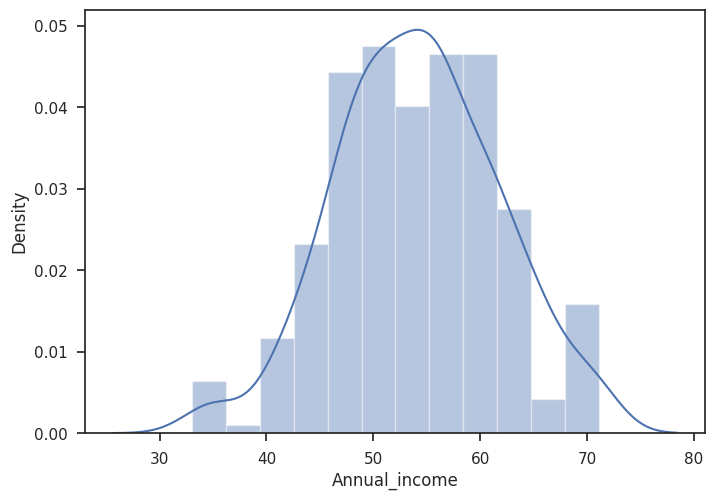

In [145]:
# cube root transformation
data_ml_test['Annual_income'] = np.cbrt(data_ml_test['Annual_income'])
sns.distplot(data_ml_test['Annual_income'])

<Axes: xlabel='Age', ylabel='Density'>

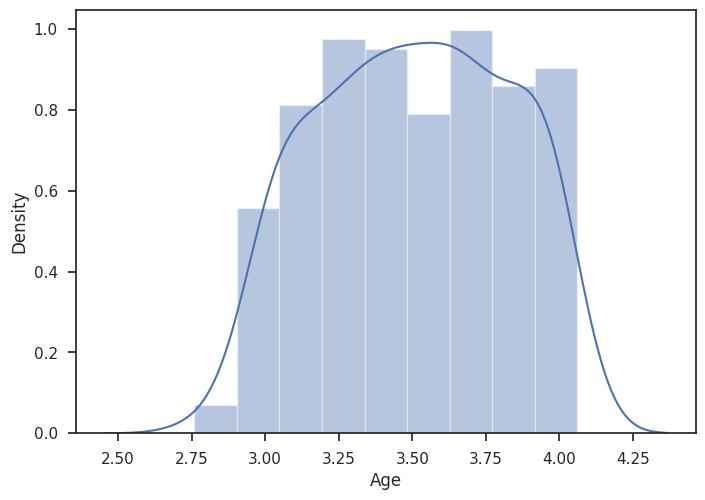

In [146]:
# cube root transformation
data_ml_test['Age'] = np.cbrt(data_ml_test['Age'])
sns.distplot(data_ml_test['Age'])

In [147]:
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Define the columns to be scaled
cols_to_scale = ['Age', 'Annual_income', 'Employed_Years']

# Fit and transform the selected columns
data_ml_test[cols_to_scale] = scaler.fit_transform(data_ml_test[cols_to_scale])

# Check the scaled columns
print(data_ml_test[cols_to_scale])


      Age  Annual_income  Employed_Years
30   0.34           0.31            0.63
1514 0.89           0.21            0.15
1182 0.55           0.27            0.30
1205 0.94           0.40            0.16
528  0.24           0.73            0.15
...   ...            ...             ...
1228 0.75           0.90            0.39
1065 0.89           0.40            0.41
1345 0.21           0.73            0.01
485  0.51           0.55            0.50
874  0.53           0.55            0.14

[298 rows x 3 columns]


In [148]:
data_ml_test['label'] = pd.to_numeric(data_ml_test['label'])

In [149]:
oversample = SMOTE(sampling_strategy='minority')
X_bal, y_bal = oversample.fit_resample(data_ml_test.loc[:, data_ml_test.columns != 'label'],data_ml_test['label'])
data_ml_test = pd.concat([pd.DataFrame(X_bal),pd.DataFrame(y_bal)],axis=1)

In [150]:
# split the train data into X and y (target)
X_test, y_test = data_ml_test.loc[:, data_ml_test.columns != 'label'], data_ml_test['label'].astype('int64')

# **Model Training**

# Logistic Regression

In [151]:
### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score

In [152]:
### Creating a Logistic regression object
logistic_reg=LogisticRegression(random_state = 0)

In [153]:
### Passing independant and dependant training data to the model
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [154]:
logistic_reg_pred=logistic_reg.predict(X_test)
logistic_reg_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [155]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[163, 109],
       [ 88, 184]])

In [156]:
### accuracy using accuracy_score
print(round(accuracy_score(y_test, logistic_reg_pred), 2))

0.64


In [157]:
print(round(precision_score(y_test, logistic_reg_pred), 2))

0.63


In [158]:
print(round(recall_score(y_test, logistic_reg_pred), 2))

0.68


In [159]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.6378676470588235

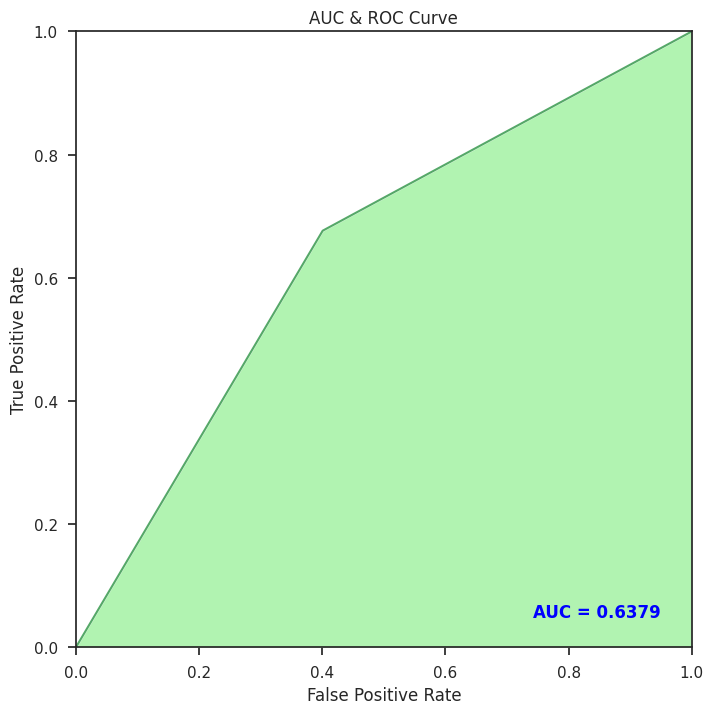

In [160]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# Decision Tree

In [161]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier()

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [162]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.9962 
Decision tree testing set accuracy: 0.7132 


In [163]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.85      0.75       272
           1       0.79      0.58      0.67       272

    accuracy                           0.71       544
   macro avg       0.73      0.71      0.71       544
weighted avg       0.73      0.71      0.71       544



In [164]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification.predict(X_test)

In [165]:
print(f"Decision tree training set accuracy: {format(classification.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classification.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 0.6358 
Decision tree testing set accuracy: 0.6140 


In [166]:
# Model Accuracy, how often is the classifier correct?
# print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.29      0.43       272
           1       0.57      0.93      0.71       272

    accuracy                           0.61       544
   macro avg       0.69      0.61      0.57       544
weighted avg       0.69      0.61      0.57       544



# Random Forest Classifier

In [167]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [168]:
#Predicting the test set result
y_pred= classifier.predict(X_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[257,  15],
       [100, 172]])

In [169]:
print(f"Random Forest training set accuracy: {format(classifier.score(X_train, y_train), '.4f')} ")
print(f"Random Forest testing set accuracy: {format(classifier.score(X_test, y_test), '.4f')} ")

Random Forest training set accuracy: 0.9939 
Random Forest testing set accuracy: 0.7886 


# Support Vector Machine

In [170]:
Classifier_svc= SVC(random_state=42,probability=True)
Classifier_svc.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [171]:
#Predicting the test set result
y_pred= Classifier_svc.predict(X_test)
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[198,  74],
       [ 70, 202]])

In [172]:
print(f"SVC training set accuracy: {format(Classifier_svc.score(X_train, y_train), '.4f')} ")
print(f"SVC testing set accuracy: {format(Classifier_svc.score(X_test, y_test), '.4f')} ")

SVC training set accuracy: 0.7975 
SVC testing set accuracy: 0.7353 


# Cross Validation

In [173]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

#Implementing cross validation

k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []

In [174]:
for train_index , test_index in kf.split(X_test):
    x_train , x_test = X_test.iloc[train_index,:],X_test.iloc[test_index,:]
    y_train , Y_test = y_test[train_index] , y_test[test_index]

    model.fit(x_train,y_train)
    pred_values = model.predict(x_test)

    acc = accuracy_score(pred_values , Y_test)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.6055045871559633, 0.5779816513761468, 0.7339449541284404, 1.0, 0.9722222222222222]
Avg accuracy : 0.7779306829765545


In [175]:
# split the train data into X and y (target)
X_train, y_train = data_ml.loc[:, data_ml.columns != 'label'], data_ml['label'].astype('int64')

In [177]:
# split the train data into X and y (target)
X_test, y_test = data_ml_test.loc[:, data_ml_test.columns != 'label'], data_ml_test['label'].astype('int64')

# Gradient Boosting Classifier

In [178]:
gradient_boosting= GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [179]:
#Predicting the test set result
y_pred= gradient_boosting.predict(X_test)

In [180]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[248  24]
 [ 28 244]]
0.9044117647058824


# Bagging

In [181]:
bagging= BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [182]:
#Predicting the test set result
y_pred= bagging.predict(X_test)

In [183]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[256  16]
 [107 165]]
0.7738970588235294


# Ada boost

In [184]:
adaboost= AdaBoostClassifier(random_state=42)
adaboost.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [185]:
#Predicting the test set result
y_pred= adaboost.predict(X_test)

In [186]:
cm= confusion_matrix(y_test, y_pred)
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[218  54]
 [ 45 227]]
0.8180147058823529


# We can conclude that our Top most Model is:
**Gradient Boosting Classifier with 90.44% accuracy.**